In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet')

In [3]:
import time, os, math, random
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats
import pylab as pl

### Visulize sự phân bố các thuộc tính

                     mean          std
Q               70.973647   119.919625
Conductivity  3825.243656  7545.643606
NO3              0.230487     0.294789
Temp            25.812629     2.870843
Turbidity        8.955224    31.679694
Level           15.138370     0.537120


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

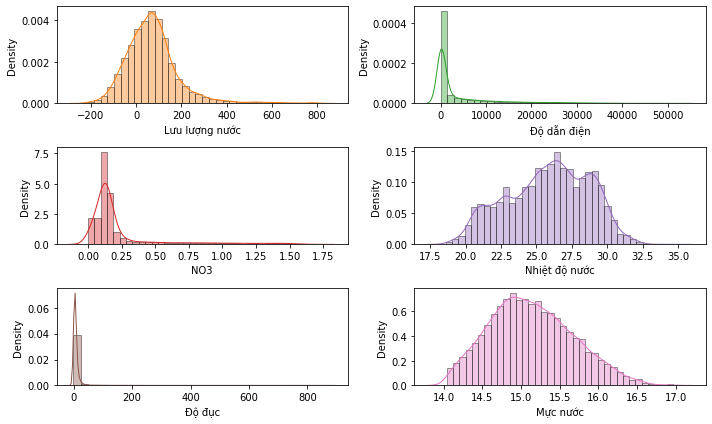

In [ ]:
path = '/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/data/data_Mực_Nước/Mulgrave_nomiss.csv'
df = pd.read_csv(path)
df.drop(['Timestamp','Dayofweek','Month'], axis=1, inplace=True)
statistic = df.describe().T
print(statistic.loc[:,['mean','std']])

h1 = df['Q'].values
h1.sort()
fit1 = stats.norm.pdf(h1, np.mean(h1), np.std(h1)) 

h2 = df['Conductivity'].values
h2.sort()
fit2 = stats.norm.pdf(h2, np.mean(h2), np.std(h2)) 

h3 = df['NO3'].values
h3.sort()
fit3 = stats.norm.pdf(h3, np.mean(h3), np.std(h3)) 

h4 = df['Temp'].values
h4.sort()
fit4 = stats.norm.pdf(h4, np.mean(h4), np.std(h4)) 

h5 = df['Turbidity'].values
h5.sort()
fit5 = stats.norm.pdf(h5, np.mean(h5), np.std(h5)) 

h6 = df['Level'].values
h6.sort()
fit6 = stats.norm.pdf(h6, np.mean(h6), np.std(h6))  

#"Tableau 20" colors  RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale giá trị RGB trong phạm vi [0, 1]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (10,6))


sns.distplot(df['Q'], hist=True, kde=True, 
             bins=int(180/5), color = tableau20[2], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax[0, 0])

ax[0, 0].set(xlabel='Lưu lượng nước')

sns.distplot(df['Conductivity'], hist=True, kde=True, 
             bins=int(180/5), color = tableau20[4], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax[0, 1])

#
ax[0, 1].set(xlabel='Độ dẫn điện')

sns.distplot(df['NO3'], hist=True, kde=True, 
             bins=int(180/5), color = tableau20[6], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax[1, 0])

ax[1, 0].set(xlabel='NO3')

sns.distplot(df['Temp'], hist=True, kde=True, 
             bins=int(180/5), color = tableau20[8], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax[1, 1])

ax[1, 1].set(xlabel='Nhiệt độ nước')

sns.distplot(df['Turbidity'], hist=True, kde=True, 
             bins=int(180/5), color = tableau20[10], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax[2, 0])

#
ax[2, 0].set(xlabel='Độ đục')

sns.distplot(df['Level'], hist=True, kde=True, 
             bins=int(180/5), color = tableau20[12], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax[2, 1])

ax[2, 1].set(xlabel='Mực nước')
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 29052 entries, 2016-12-08T12:00:00 to 2020-04-01T23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q             23142 non-null  float64
 1   Conductivity  14977 non-null  float64
 2   NO3           6879 non-null   float64
 3   Temp          9348 non-null   float64
 4   Turbidity     14977 non-null  float64
 5   Level         11633 non-null  float64
dtypes: float64(6)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8712 entries, 2019-01-01T00:00:00 to 2019-12-29T23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q             7022 non-null   float64
 1   Conductivity  5689 non-null   float64
 2   NO3           5442 non-null   float64
 3   Temperature   5689 non-null   float64
 4   Turbidity     5689 non-null   float64
 5   Level         8705 non-null   float

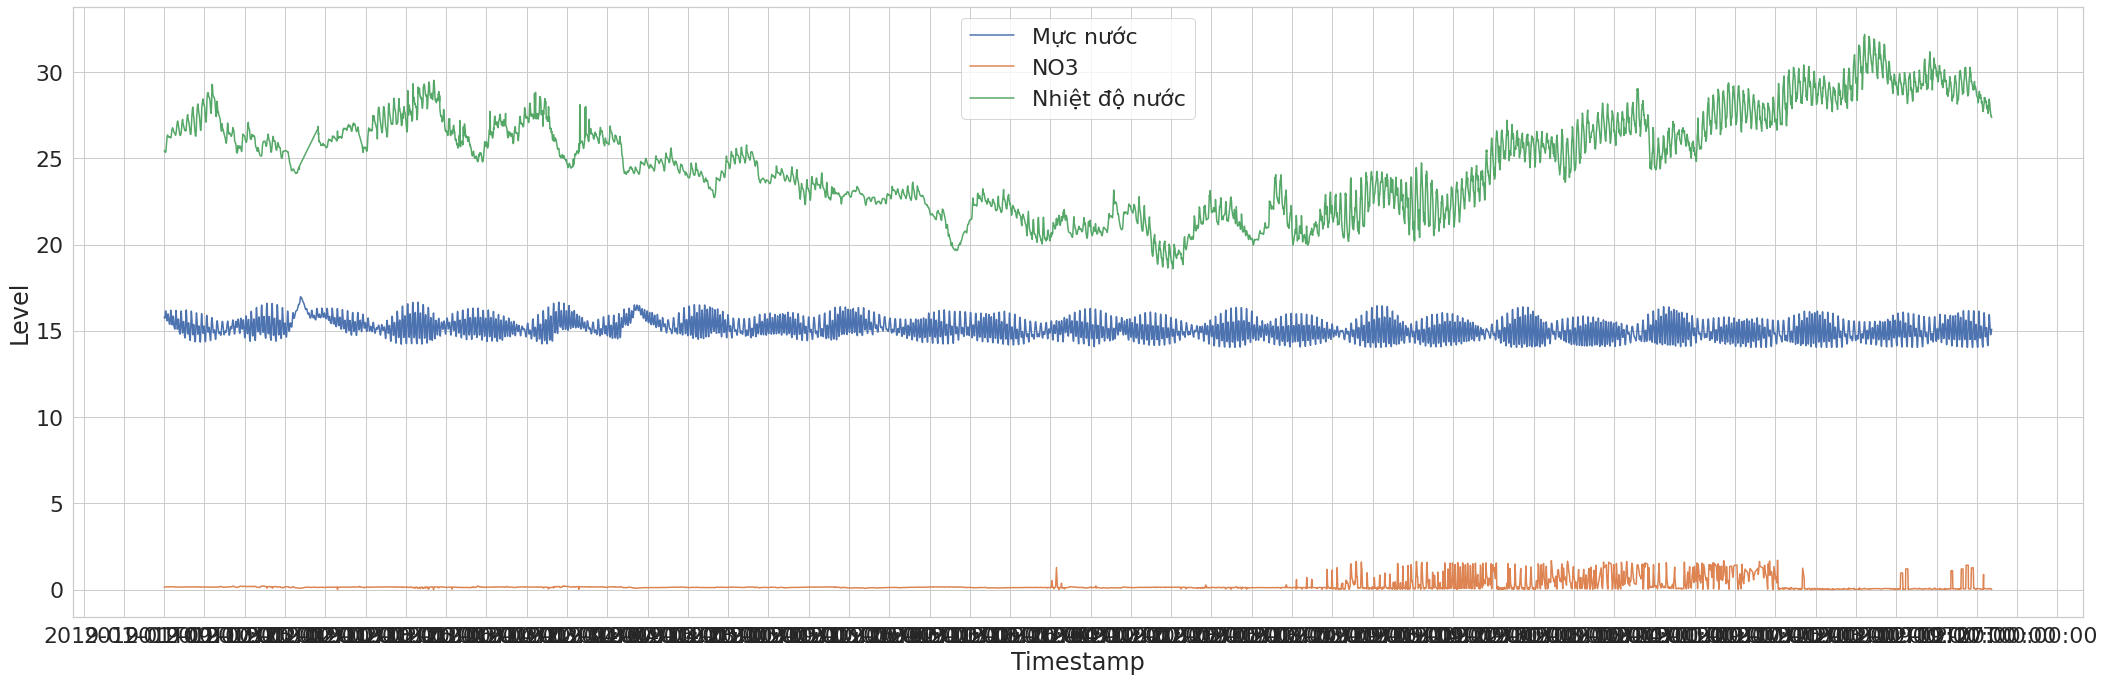

In [ ]:
sns.set(style="whitegrid", font_scale=2)

SEED = 1234
random.seed(SEED)


path = '/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/data/data_Mực_Nước/data tham khảo/russell_river_east_russell_joined.csv/russell_river_east_russell_joined.csv'

df = pd.read_csv(path)
df.set_index('Timestamp', inplace=True)
df.drop(columns=['Dayofweek', 'Month'], inplace=True)

print(df.info())

df.columns = ['Q', 'Conductivity', 'NO3', 'Temperature', 'Turbidity', 'Level']
df = df.loc['2019-01-01T00:00':'2019-12-30T00:00']
df.replace(0, np.nan, inplace=True)

print(df.info())

#f, axes = plt.subplots(1, 2, figsize=(20, 10))

plt.figure(figsize=(30,10))

#ax1 = sns.lineplot(x=df.index, y=df['Level'], ax=axes[0])
#ax2 = sns.lineplot(x=df.index, y=df['NO3'], ax=axes[1])

ax1 = sns.lineplot(x=df.index, y=df['Level'], label='Mực nước')
ax2 = sns.lineplot(x=df.index, y=df['NO3'], label='NO3')
ax3 = sns.lineplot(x=df.index, y=df['Temperature'], label='Nhiệt độ nước')


#axes[0].set_xticklabels(df.index, rotation=45)
#axes[1].set_xticklabels(df.index, rotation=45)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(192))



#axes[0].set(xlabel='Date', ylabel='Level')
#axes[1].set(xlabel='Date', ylabel='Nitrate')

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 29052 entries, 2016-12-08T12:00:00 to 2020-04-01T23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q             23142 non-null  float64
 1   Conductivity  14977 non-null  float64
 2   NO3           6879 non-null   float64
 3   Temp          9348 non-null   float64
 4   Turbidity     14977 non-null  float64
 5   Level         11633 non-null  float64
dtypes: float64(6)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8712 entries, 2019-01-01T00:00:00 to 2019-12-29T23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q             7022 non-null   float64
 1   Conductivity  5689 non-null   float64
 2   NO3           5442 non-null   float64
 3   Temperature   5689 non-null   float64
 4   Turbidity     5689 non-null   float64
 5   Level         8705 non-null   float

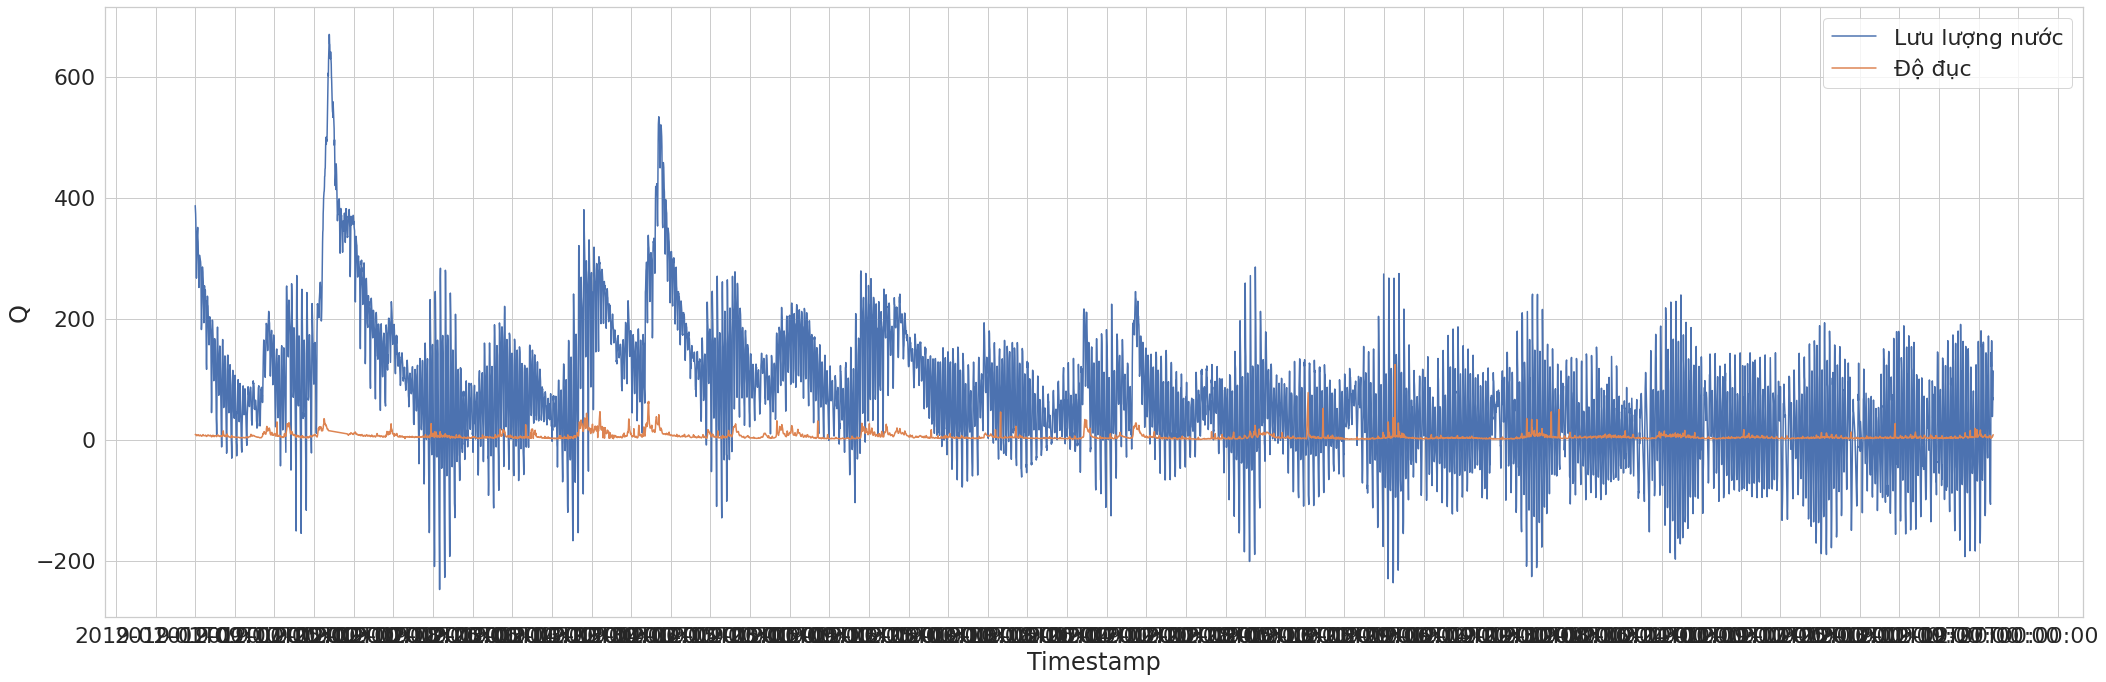

In [ ]:
sns.set(style="whitegrid", font_scale=2)

SEED = 1234
random.seed(SEED)


path = '/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/data/data_Mực_Nước/data tham khảo/russell_river_east_russell_joined.csv/russell_river_east_russell_joined.csv'

df = pd.read_csv(path)
df.set_index('Timestamp', inplace=True)
df.drop(columns=['Dayofweek', 'Month'], inplace=True)

print(df.info())

df.columns = ['Q', 'Conductivity', 'NO3', 'Temperature', 'Turbidity', 'Level']
df = df.loc['2019-01-01T00:00':'2019-12-30T00:00']
df.replace(0, np.nan, inplace=True)

print(df.info())

#f, axes = plt.subplots(1, 2, figsize=(20, 10))

plt.figure(figsize=(30,10))

#ax1 = sns.lineplot(x=df.index, y=df['Level'], ax=axes[0])
#ax2 = sns.lineplot(x=df.index, y=df['NO3'], ax=axes[1])

ax1 = sns.lineplot(x=df.index, y=df['Q'], label='Lưu lượng nước')
#ax2 = sns.lineplot(x=df.index, y=df['Conductivity'], label='Độ dẫn điện')
ax3 = sns.lineplot(x=df.index, y=df['Turbidity'], label='Độ đục')


#axes[0].set_xticklabels(df.index, rotation=45)
#axes[1].set_xticklabels(df.index, rotation=45)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(192))



#axes[0].set(xlabel='Date', ylabel='Level')
#axes[1].set(xlabel='Date', ylabel='Nitrate')

plt.tight_layout()
plt.show()

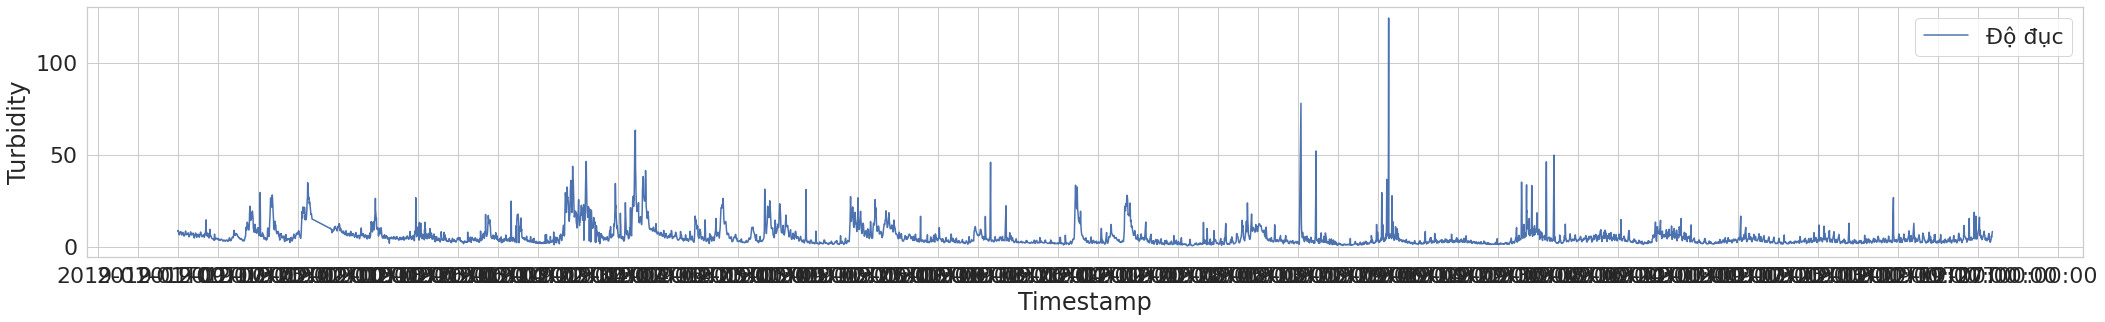

In [ ]:
plt.figure(figsize=(30,5))

#ax1 = sns.lineplot(x=df.index, y=df['Level'], ax=axes[0])
#ax2 = sns.lineplot(x=df.index, y=df['NO3'], ax=axes[1])

#ax1 = sns.lineplot(x=df.index, y=df['Q'], label='Lưu lượng nước')
#ax2 = sns.lineplot(x=df.index, y=df['Conductivity'], label='Độ dẫn điện')
ax1 = sns.lineplot(x=df.index, y=df['Turbidity'], label='Độ đục')


#axes[0].set_xticklabels(df.index, rotation=45)
#axes[1].set_xticklabels(df.index, rotation=45)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(192))



#axes[0].set(xlabel='Date', ylabel='Level')
#axes[1].set(xlabel='Date', ylabel='Nitrate')

plt.tight_layout()
plt.show()

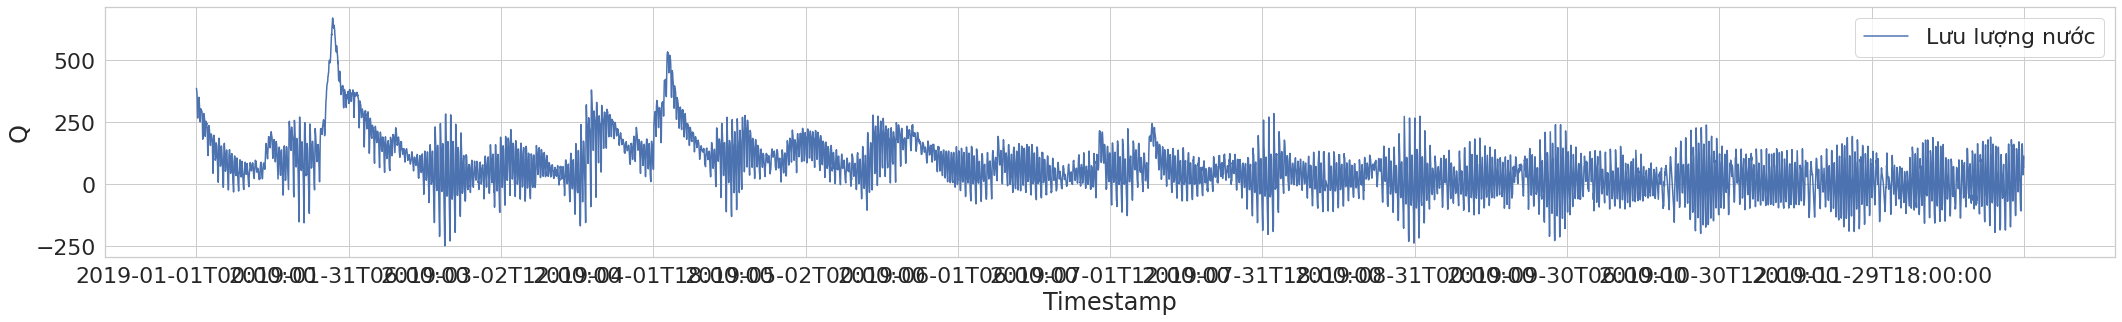

In [ ]:
plt.figure(figsize=(30,5))



ax1 = sns.lineplot(x=df.index, y=df['Q'], label='Lưu lượng nước')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))


plt.tight_layout()
plt.show()

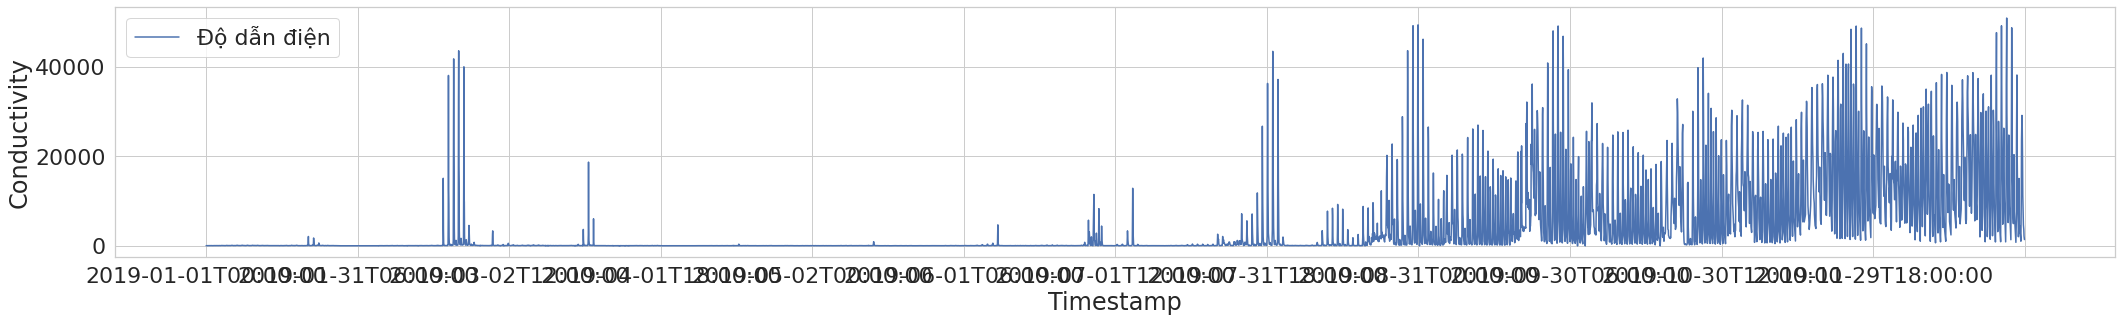

In [ ]:
plt.figure(figsize=(30,5))

ax1 = sns.lineplot(x=df.index, y=df['Conductivity'], label='Độ dẫn điện')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))

plt.tight_layout()
plt.show()

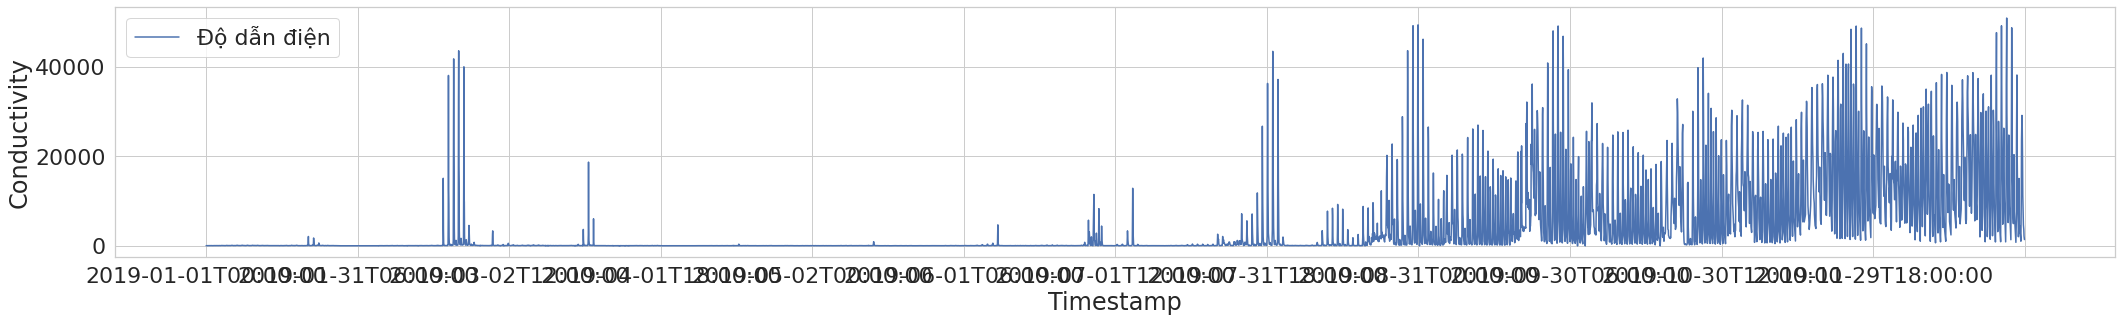

In [ ]:
plt.figure(figsize=(30,5))

ax1 = sns.lineplot(x=df.index, y=df['Conductivity'], label='Độ dẫn điện')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))

plt.tight_layout()
plt.show()

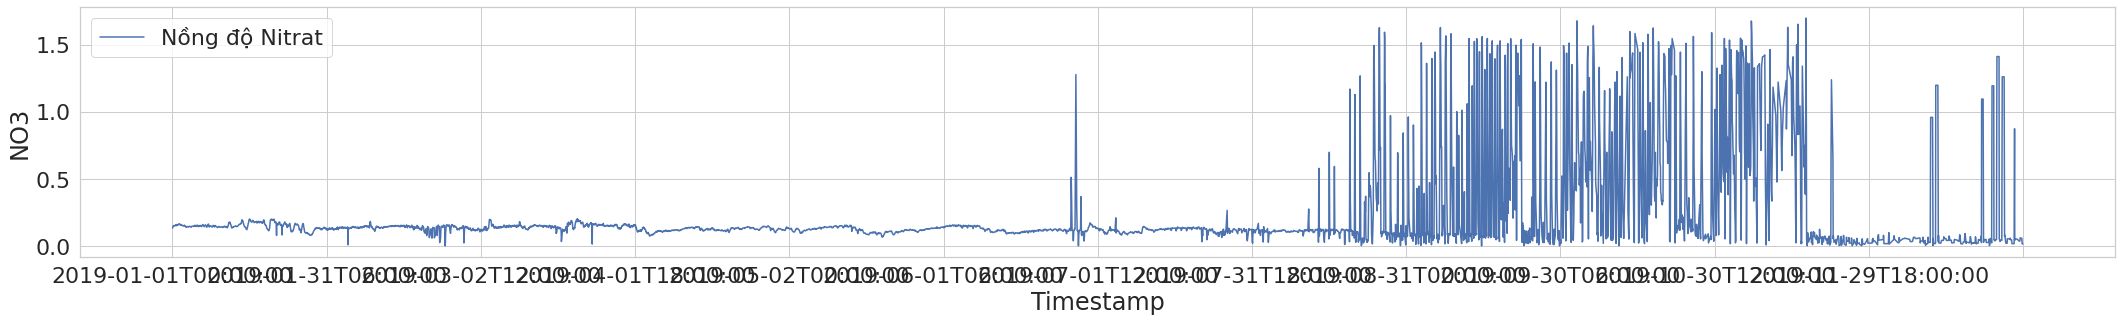

In [ ]:
plt.figure(figsize=(30,5))

ax1 = sns.lineplot(x=df.index, y=df['NO3'], label='Nồng độ Nitrat')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))

plt.tight_layout()
plt.show()

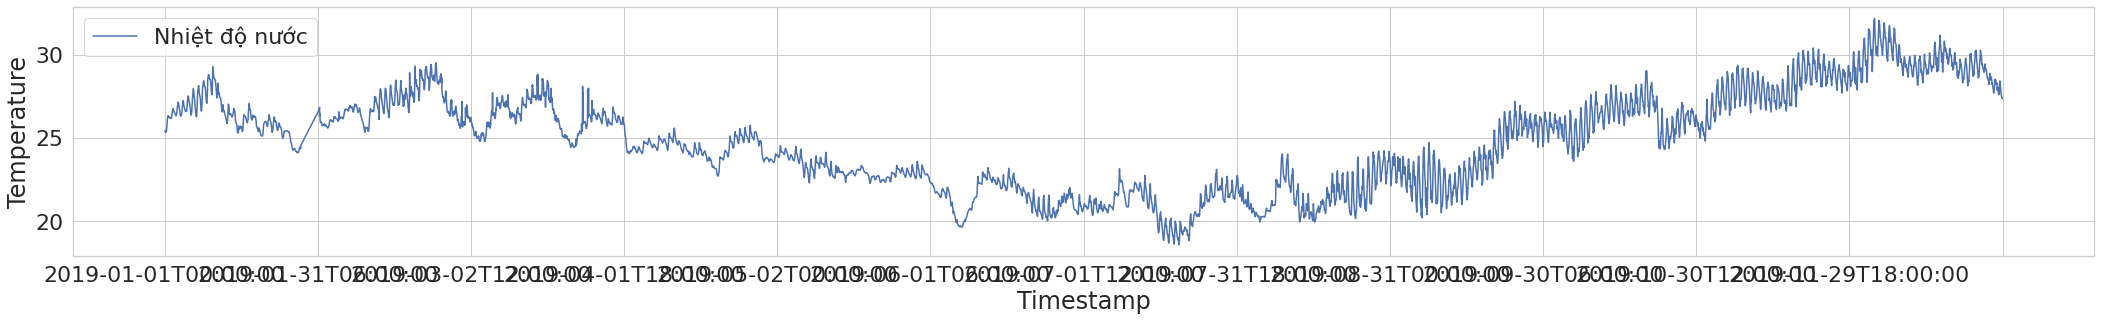

In [ ]:
plt.figure(figsize=(30,5))

ax1 = sns.lineplot(x=df.index, y=df['Temperature'], label='Nhiệt độ nước')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))

plt.tight_layout()
plt.show()

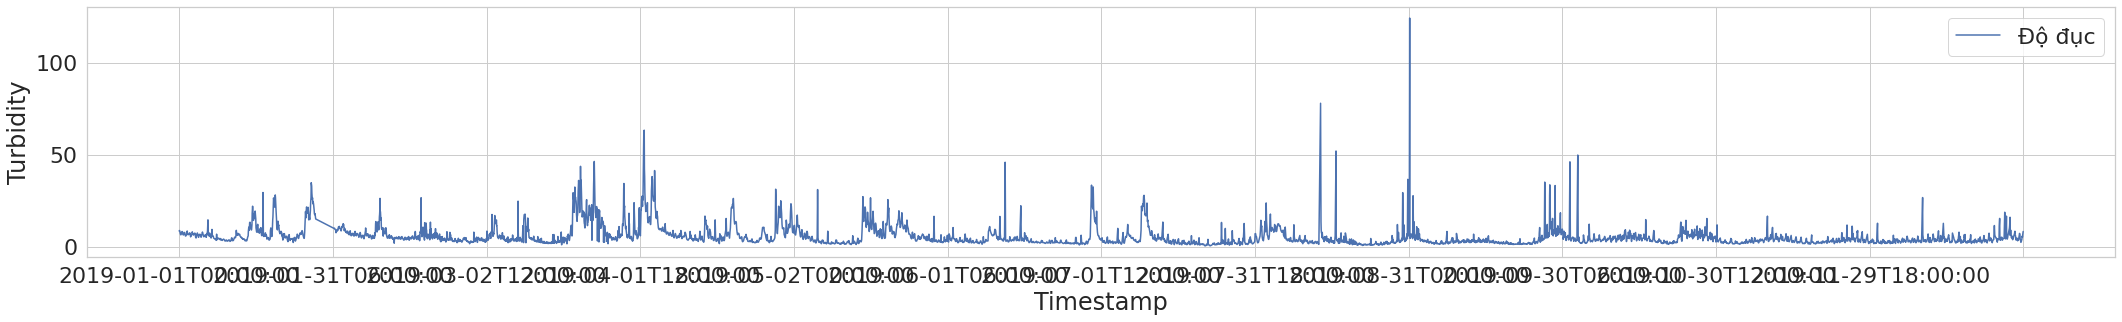

In [ ]:
plt.figure(figsize=(30,5))

ax1 = sns.lineplot(x=df.index, y=df['Turbidity'], label='Độ đục')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))

plt.tight_layout()
plt.show()

AttributeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7efcae2ce560> (for post_execute):


KeyboardInterrupt: ignored

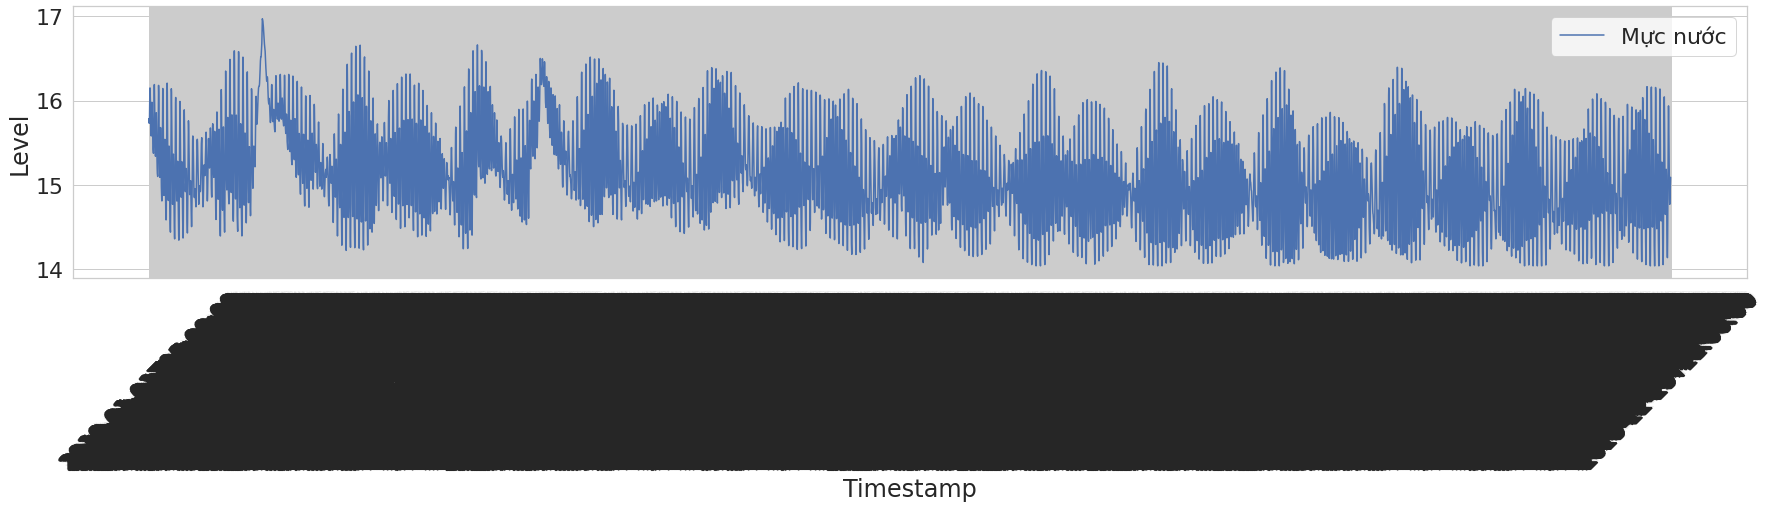

In [ ]:
plt.figure(figsize=(30,5))

ax1 = sns.lineplot(x=df.index, y=df['Level'], label='Mực nước')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(726))

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Q', 'Conductivity', 'NO3', 'Temperature', 'Turbidity', 'Level'], dtype='object')

In [ ]:
import matplotlib.dates as mdates

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 2019-03-01T00:00:00 to 2019-03-29T23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q             696 non-null    float64
 1   Conductivity  696 non-null    float64
 2   NO3           696 non-null    float64
 3   Temperature   696 non-null    float64
 4   Turbidity     696 non-null    float64
 5   Level         696 non-null    float64
dtypes: float64(6)
memory usage: 38.1+ KB
None


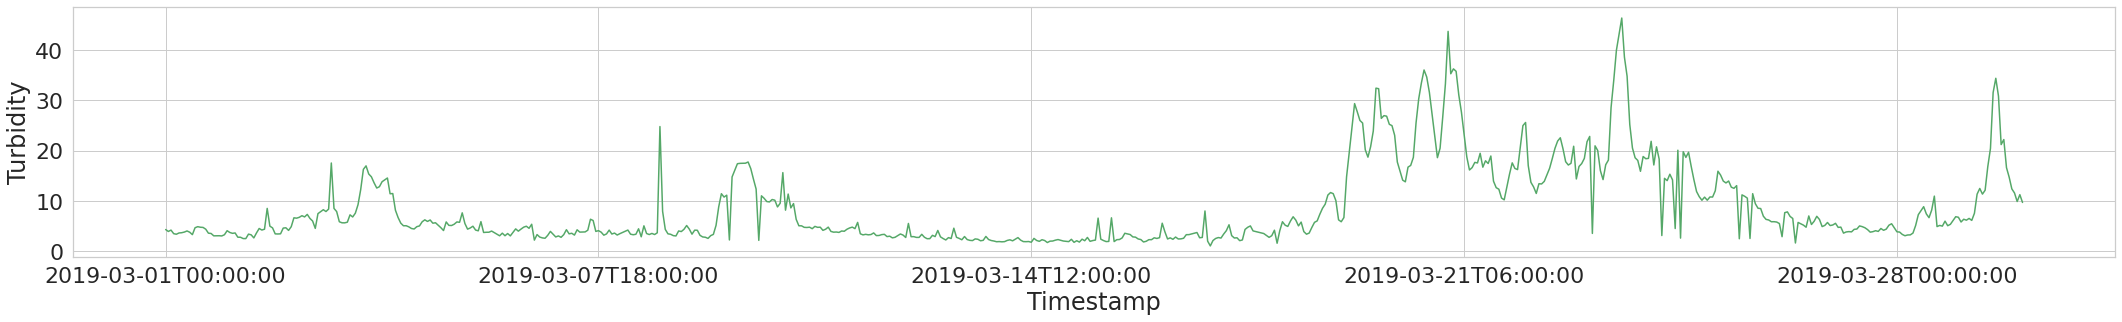

In [ ]:
SEED = 1234
random.seed(SEED)


path='/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/data/data_Mực_Nước/Mulgrave_2019_Theo_Gio_NoMiss.csv'

df = pd.read_csv(path)
df.set_index('Timestamp', inplace=True)
df.drop(columns=['Dayofweek', 'Month'], inplace=True)

df.columns = ['Q', 'Conductivity', 'NO3', 'Temperature', 'Turbidity', 'Level']
df = df.loc['2019-03-01T00:00':'2019-03-30T00:00']


print(df.info())

f, axes = plt.subplots(1, 1, figsize=(30, 5))

ax1 = sns.lineplot(x=df.index, y=df['Turbidity'], color='g')
#ax2 = sns.lineplot(x=df.index, y=df['NO3'], ax=axes[1])

ax1.xaxis.set_major_locator(ticker.MultipleLocator(162))
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(162))

#axes[0].set_xticklabels(df.index, rotation=45)
#axes[1].set_xticklabels(df.index, rotation=45)




#axes[0].set(xlabel='Date', ylabel='Độ đục của nước')
#axes[1].set(xlabel='Date', ylabel='Nitrate')

plt.tight_layout()
plt.show()

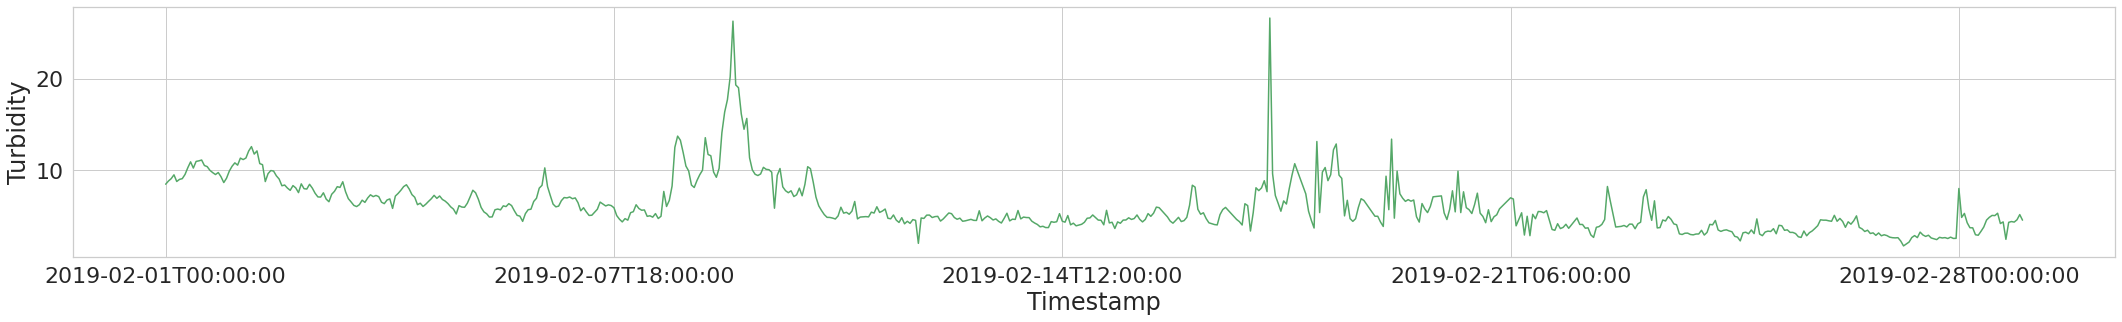

In [ ]:
path='/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/data/data_Mực_Nước/Mulgrave_2019_Theo_Gio_NoMiss.csv'

df = pd.read_csv(path)
df.set_index('Timestamp', inplace=True)
df.drop(columns=['Dayofweek', 'Month'], inplace=True)

df.columns = ['Q', 'Conductivity', 'NO3', 'Temperature', 'Turbidity', 'Level']
df = df.loc['2019-02-01T00:00':'2019-02-30T00:00']
f, axes = plt.subplots(1, 1, figsize=(30, 5))

ax1 = sns.lineplot(x=df.index, y=df['Turbidity'], color = 'g')
#ax2 = sns.lineplot(x=df.index, y=df['NO3'], ax=axes[1])

ax1.xaxis.set_major_locator(ticker.MultipleLocator(162))
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(162))

#axes[0].set_xticklabels(df.index, rotation=45)
#axes[1].set_xticklabels(df.index, rotation=45)




#axes[0].set(xlabel='Date', ylabel='Độ đục của nước')
#axes[1].set(xlabel='Date', ylabel='Nitrate')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temp_path  = "/content/drive/MyDrive/Project_HK1_2022/Data_Visualization/data/Daily_Max_min_Temperature_2017_2019.csv"
rain_path  = "/content/drive/MyDrive/Project_HK1_2022/Data_Visualization/data/Deeral_Amount_2017_2018_2019.csv"
data_temp = pd.read_csv(temp_path)
data_rain = pd.read_csv(rain_path)

In [ ]:
data_rain

Date time Amount
0      2017-Jan-1      0
1      2017-Jan-2    0.4
2      2017-Jan-3     40
3      2017-Jan-4     69
4      2017-Jan-5     25
...           ...    ...
1090  2019-Dec-27     11
1091  2019-Dec-28     17
1092  2019-Dec-29     20
1093  2019-Dec-30     52
1094  2019-Dec-31      1

[1095 rows x 2 columns]

In [ ]:
1095/12

91.25

In [ ]:
data_rain.set_index('Date time', inplace=True)

In [ ]:
data_rain

Amount
Date time         
2017-Jan-1       0
2017-Jan-2     0.4
2017-Jan-3      40
2017-Jan-4      69
2017-Jan-5      25
...            ...
2019-Dec-27     11
2019-Dec-28     17
2019-Dec-29     20
2019-Dec-30     52
2019-Dec-31      1

[1095 rows x 1 columns]

In [ ]:
data_rain = data_rain.loc['2019-Jan-1':'2019-Dec-31']

In [ ]:
data_rain

Amount
Date time         
2019-Jan-1       2
2019-Jan-2       9
2019-Jan-3     0.4
2019-Jan-4       0
2019-Jan-5       6
...            ...
2019-Dec-27     11
2019-Dec-28     17
2019-Dec-29     20
2019-Dec-30     52
2019-Dec-31      1

[365 rows x 1 columns]

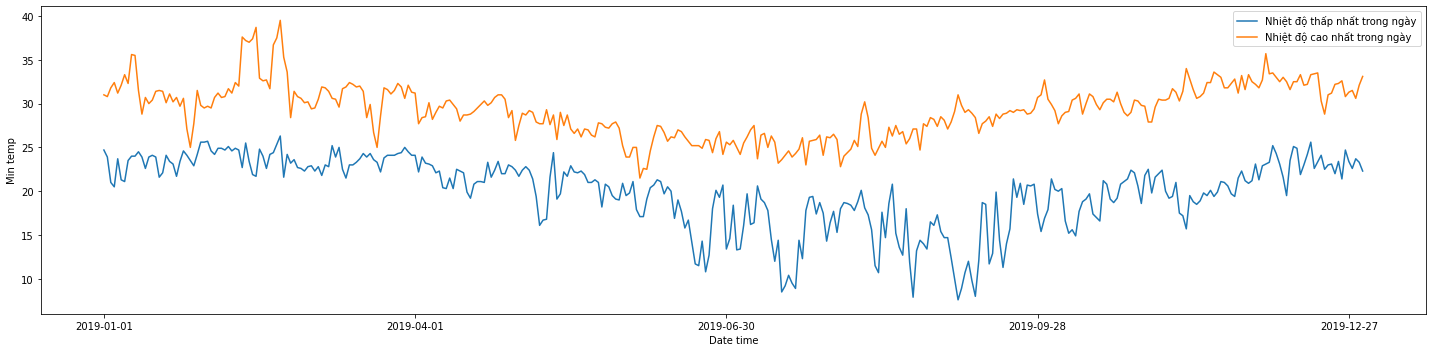

In [ ]:
plt.figure(figsize=(20,5))



ax1 = sns.lineplot(x=data_temp.index, y=data_temp['Min temp'], label='Nhiệt độ thấp nhất trong ngày')
ax2 = sns.lineplot(x=data_temp.index, y=data_temp['Max temp'], label='Nhiệt độ cao nhất trong ngày')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(90))





plt.tight_layout()
plt.show()

In [ ]:
data_rain  = data_rain[(data_rain['Date time'] >= '2019-01-01') & (data_rain['Date time'] <= '2019-12-31')]

In [ ]:
data_rain

Empty DataFrame
Columns: [Date time, Amount]
Index: []

In [4]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 8.2 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=5d666e8a9c585d5c1f49e9aab1dc242dc48e2116f6af7560e7db56385982b5a7
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=aca0a03d6f3c8841aac920069a99829b54beae95629027158d6567d1f071fb3f
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [5]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 4.9 MB/s 


In [6]:
pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import sys
sys.path.append('/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet')

### Visu NO3

#### 10

train_preprocess:(6551, 6)
test_preprocess:(2207, 6)
concatenated_x (6512, 40, 6)
concatenated_y (6512, 20)
len_all_case (6512,)
len_before_all_case (6512,)
x:(6512, 40, 6)
y:(6512, 20, 1)
concatenated_x (2168, 40, 6)
concatenated_y (2168, 20)
len_all_case (2168,)
len_before_all_case (2168,)
x:(2168, 40, 6)
y:(2168, 20, 1)
x_train:(6512, 40, 6)
y_train:(6512, 20, 1)
x_test:(2168, 40, 6)
y_test:(2168, 20, 1)
split train/test array
(2168, 10, 6)
(2168, 20, 6)
(2168, 10, 6)
split train/test array
X_train_left:(6512, 10, 6)
X_train_right:(6512, 10, 6)
X_test_left:(2168, 10, 6)
X_test_right:(2168, 10, 6)
____________________________________________________________________
*************
i=:  0
left:  [1.362, 0.936, 0.509, 0.4238, 0.3386, 0.2534, 0.1682, 0.083, 0.038, 0.505]
mid:  [0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291]
right: [0.178, 0.065, 0.046, 

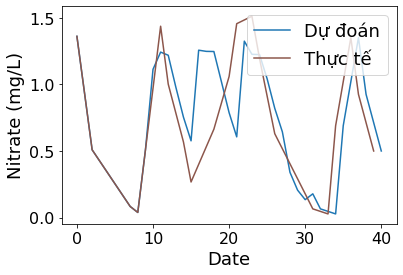

*************
i=:  20
left:  [1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291]
mid:  [0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622]
right: [0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225, 0.436, 0.4235, 0.411, 1.044, 1.361]


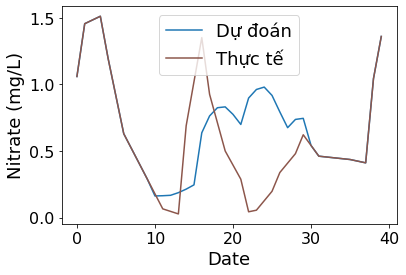

*************
i=:  40
left:  [0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622]
mid:  [0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225, 0.436, 0.4235, 0.411, 1.044, 1.361, 1.6780000000000002, 1.485, 1.388, 1.291, 1.098, 0.9559999999999998, 0.8140000000000001, 0.6940000000000001, 0.688, 0.682]
right: [0.5685, 0.45500000000000007, 0.496, 0.5379999999999999, 0.5585, 0.579, 0.3755, 0.172, 0.411, 0.65]


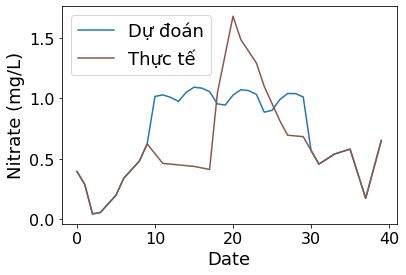

*************
i=:  60
left:  [1.6780000000000002, 1.485, 1.388, 1.291, 1.098, 0.9559999999999998, 0.8140000000000001, 0.6940000000000001, 0.688, 0.682]
mid:  [0.5685, 0.45500000000000007, 0.496, 0.5379999999999999, 0.5585, 0.579, 0.3755, 0.172, 0.411, 0.65, 0.713, 0.7759999999999999, 0.528, 0.4035, 0.2789999999999999, 0.031, 0.0355, 0.04, 0.5710000000000001, 0.836]
right: [1.101, 1.139, 1.146, 1.153, 1.135, 0.997, 0.8590000000000001, 0.718, 0.6920000000000001, 0.6659999999999999]


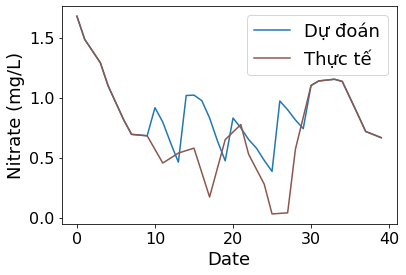

*************
i=:  80
left:  [0.713, 0.7759999999999999, 0.528, 0.4035, 0.2789999999999999, 0.031, 0.0355, 0.04, 0.5710000000000001, 0.836]
mid:  [1.101, 1.139, 1.146, 1.153, 1.135, 0.997, 0.8590000000000001, 0.718, 0.6920000000000001, 0.6659999999999999, 0.5870000000000001, 0.508, 0.47700000000000004, 0.624, 0.5705, 0.517, 0.4789999999999999, 0.44100000000000006, 0.9100000000000001, 1.38]
right: [1.4340000000000002, 1.4880000000000002, 0.77, 0.4115, 0.053, 0.597, 0.8690000000000002, 1.141, 1.254, 1.0905]


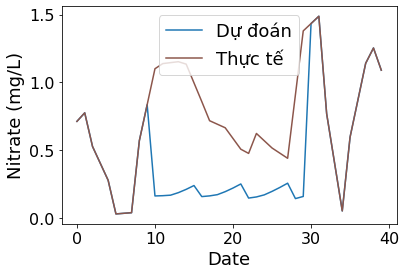

*************
i=:  100
left:  [0.5870000000000001, 0.508, 0.47700000000000004, 0.624, 0.5705, 0.517, 0.4789999999999999, 0.44100000000000006, 0.9100000000000001, 1.38]
mid:  [1.4340000000000002, 1.4880000000000002, 0.77, 0.4115, 0.053, 0.597, 0.8690000000000002, 1.141, 1.254, 1.0905, 0.927, 0.5660000000000001, 0.6725, 0.779, 0.708, 0.6725, 0.637, 0.5660000000000001, 0.5315, 0.497]
right: [0.417, 0.337, 0.257, 0.5425, 0.828, 1.398, 1.5195, 1.641, 1.543, 1.4935]


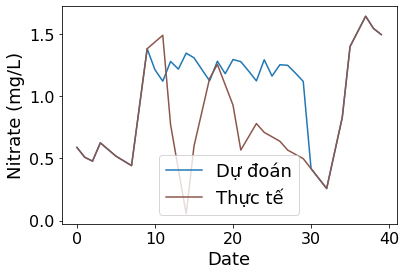

*************
i=:  120
left:  [0.927, 0.5660000000000001, 0.6725, 0.779, 0.708, 0.6725, 0.637, 0.5660000000000001, 0.5315, 0.497]
mid:  [0.417, 0.337, 0.257, 0.5425, 0.828, 1.398, 1.5195, 1.641, 1.543, 1.4935, 1.444, 1.346, 1.196, 1.046, 0.9752500000000001, 0.9044999999999999, 0.83375, 0.763, 0.4799999999999999, 0.445]
right: [0.42749999999999994, 0.41, 0.3925, 0.375, 0.086, 0.091333333, 0.096666667, 0.102, 0.069, 0.036]


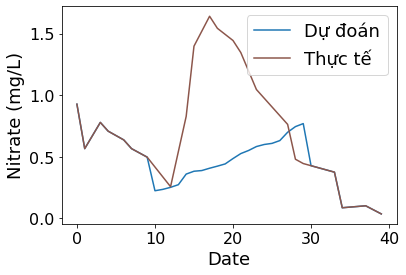

*************
i=:  140
left:  [1.444, 1.346, 1.196, 1.046, 0.9752500000000001, 0.9044999999999999, 0.83375, 0.763, 0.4799999999999999, 0.445]
mid:  [0.42749999999999994, 0.41, 0.3925, 0.375, 0.086, 0.091333333, 0.096666667, 0.102, 0.069, 0.036, 0.36, 0.522, 0.684, 1.008, 1.17, 1.332, 0.941, 0.8544000000000002, 0.7678, 0.6812]
right: [0.5946, 0.508, 0.075, 0.1695, 0.264, 0.3585, 0.45299999999999996, 0.262, 0.22640000000000002, 0.1908]


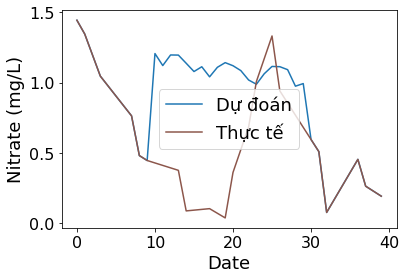

*************
i=:  160
left:  [0.36, 0.522, 0.684, 1.008, 1.17, 1.332, 0.941, 0.8544000000000002, 0.7678, 0.6812]
mid:  [0.5946, 0.508, 0.075, 0.1695, 0.264, 0.3585, 0.45299999999999996, 0.262, 0.22640000000000002, 0.1908, 0.1552, 0.1196, 0.084, 0.052, 0.02, 0.304, 0.4465, 0.589, 0.873, 1.0155]
right: [1.158, 0.79, 0.69775, 0.6055, 0.51325, 0.421, 0.237, 0.053, 0.376, 0.5375]


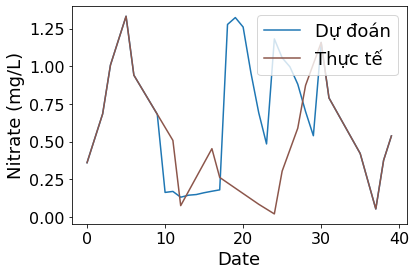

*************
i=:  180
left:  [0.1552, 0.1196, 0.084, 0.052, 0.02, 0.304, 0.4465, 0.589, 0.873, 1.0155]
mid:  [1.158, 0.79, 0.69775, 0.6055, 0.51325, 0.421, 0.237, 0.053, 0.376, 0.5375, 0.6990000000000001, 0.507, 0.315, 0.061, 0.06525, 0.0695, 0.07375, 0.078, 0.1875, 0.297]
right: [0.516, 0.7340000000000001, 0.8435, 0.9530000000000001, 1.172, 0.897, 0.622, 0.48474999999999996, 0.3475, 0.21025]


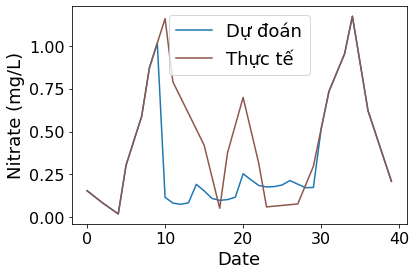

*************
i=:  200
left:  [0.6990000000000001, 0.507, 0.315, 0.061, 0.06525, 0.0695, 0.07375, 0.078, 0.1875, 0.297]
mid:  [0.516, 0.7340000000000001, 0.8435, 0.9530000000000001, 1.172, 0.897, 0.622, 0.48474999999999996, 0.3475, 0.21025, 0.073, 0.043, 0.24500000000000002, 0.447, 0.8510000000000001, 0.6485, 0.446, 0.0409999999999999, 0.04625, 0.0515]
right: [0.05675000000000001, 0.062, 0.178, 0.294, 0.526, 0.642, 0.758, 0.9899999999999999, 1.106, 1.222]


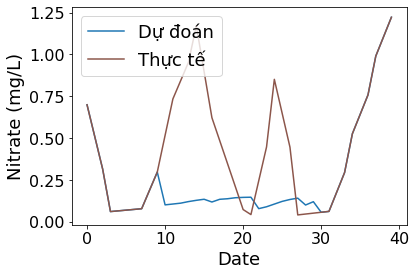

*************
i=:  220
left:  [0.073, 0.043, 0.24500000000000002, 0.447, 0.8510000000000001, 0.6485, 0.446, 0.0409999999999999, 0.04625, 0.0515]
mid:  [0.05675000000000001, 0.062, 0.178, 0.294, 0.526, 0.642, 0.758, 0.9899999999999999, 1.106, 1.222, 0.9215, 0.621, 0.420666667, 0.220333333, 0.02, 0.2335, 0.447, 0.873, 1.3, 1.0925]
right: [0.8849999999999999, 0.6779999999999999, 0.471, 0.36725, 0.2635, 0.15975, 0.0559999999999999, 0.001, 0.1405, 0.28]


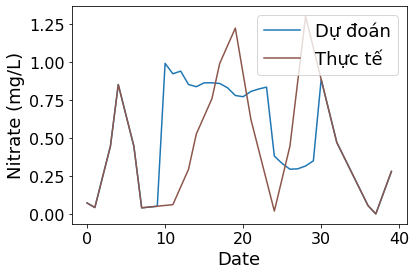

*************
i=:  240
left:  [0.9215, 0.621, 0.420666667, 0.220333333, 0.02, 0.2335, 0.447, 0.873, 1.3, 1.0925]
mid:  [0.8849999999999999, 0.6779999999999999, 0.471, 0.36725, 0.2635, 0.15975, 0.0559999999999999, 0.001, 0.1405, 0.28, 0.5589999999999999, 0.6985, 0.838, 1.117, 0.8540000000000001, 0.591, 0.4153333329999999, 0.239666667, 0.064, 0.2875]
right: [0.511, 0.9579999999999999, 1.1815, 1.405, 0.836, 0.5515, 0.267, 0.21449999999999997, 0.162, 0.1095]


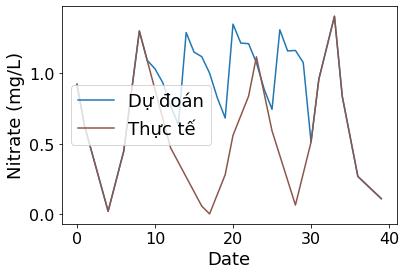

*************
i=:  260
left:  [0.5589999999999999, 0.6985, 0.838, 1.117, 0.8540000000000001, 0.591, 0.4153333329999999, 0.239666667, 0.064, 0.2875]
mid:  [0.511, 0.9579999999999999, 1.1815, 1.405, 0.836, 0.5515, 0.267, 0.21449999999999997, 0.162, 0.1095, 0.05700000000000001, 0.127823529, 0.198647059, 0.269470588, 0.340294118, 0.411117647, 0.481941176, 0.552764706, 0.623588235, 0.694411765]
right: [0.765235294, 0.8360588240000001, 0.906882353, 0.9777058819999999, 1.048529412, 1.119352941, 1.190176471, 1.261, 1.012, 0.763]


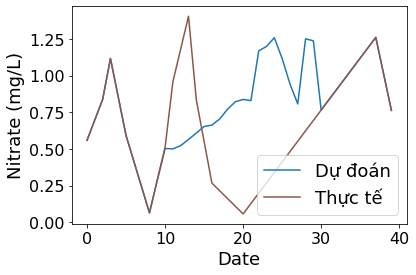

*************
i=:  280
left:  [0.05700000000000001, 0.127823529, 0.198647059, 0.269470588, 0.340294118, 0.411117647, 0.481941176, 0.552764706, 0.623588235, 0.694411765]
mid:  [0.765235294, 0.8360588240000001, 0.906882353, 0.9777058819999999, 1.048529412, 1.119352941, 1.190176471, 1.261, 1.012, 0.763, 0.266, 0.21250000000000002, 0.159, 0.1055, 0.052, 0.3095, 0.5670000000000001, 1.083, 1.3405, 1.598]
right: [1.253, 1.2715, 1.29, 1.2974, 1.3048, 1.3122, 1.3196, 1.327, 1.346, 1.365]


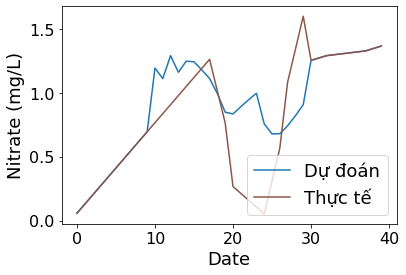

*************
i=:  300
left:  [0.266, 0.21250000000000002, 0.159, 0.1055, 0.052, 0.3095, 0.5670000000000001, 1.083, 1.3405, 1.598]
mid:  [1.253, 1.2715, 1.29, 1.2974, 1.3048, 1.3122, 1.3196, 1.327, 1.346, 1.365, 1.402, 1.4205, 1.439, 0.978, 0.748, 0.518, 0.364333333, 0.210666667, 0.05700000000000001, 0.0409999999999999]
right: [0.025, 0.805, 1.1945, 1.584, 1.574846154, 1.565692308, 1.5565384619999998, 1.547384615, 1.538230769, 1.529076923]


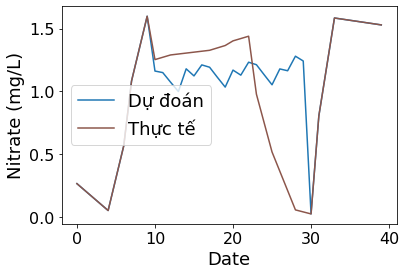

*************
i=:  320
left:  [1.402, 1.4205, 1.439, 0.978, 0.748, 0.518, 0.364333333, 0.210666667, 0.05700000000000001, 0.0409999999999999]
mid:  [0.025, 0.805, 1.1945, 1.584, 1.574846154, 1.565692308, 1.5565384619999998, 1.547384615, 1.538230769, 1.529076923, 1.5199230769999998, 1.510769231, 1.501615385, 1.492461538, 1.483307692, 1.474153846, 1.465, 0.9840000000000001, 0.7435, 0.503]
right: [0.022, 0.031333333, 0.040666667, 0.05, 0.515, 0.747, 0.9790000000000001, 1.444, 1.2135, 0.9830000000000001]


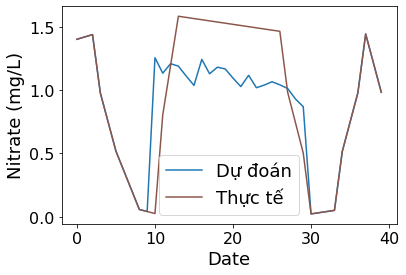

*************
i=:  340
left:  [1.5199230769999998, 1.510769231, 1.501615385, 1.492461538, 1.483307692, 1.474153846, 1.465, 0.9840000000000001, 0.7435, 0.503]
mid:  [0.022, 0.031333333, 0.040666667, 0.05, 0.515, 0.747, 0.9790000000000001, 1.444, 1.2135, 0.9830000000000001, 0.521, 0.444166667, 0.367333333, 0.2905, 0.213666667, 0.136833333, 0.05999999999999999, 0.545, 0.7875, 1.03]
right: [1.515, 1.2985, 1.082, 0.648, 0.4315, 0.215, 0.038, 0.0279999999999999, 0.018, 0.299]


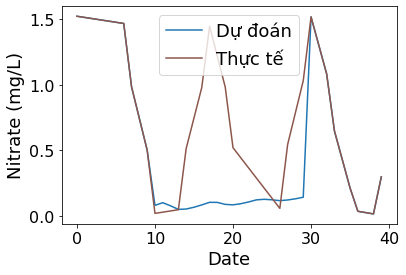

*************
i=:  360
left:  [0.521, 0.444166667, 0.367333333, 0.2905, 0.213666667, 0.136833333, 0.05999999999999999, 0.545, 0.7875, 1.03]
mid:  [1.515, 1.2985, 1.082, 0.648, 0.4315, 0.215, 0.038, 0.0279999999999999, 0.018, 0.299, 0.43900000000000006, 0.579, 0.86, 0.7245, 0.589, 0.1939999999999999, 0.1674, 0.1408, 0.11419999999999998, 0.0876]
right: [0.061, 0.033, 0.4195, 0.8059999999999999, 1.578, 1.4340000000000002, 1.29, 0.8109999999999999, 0.5715, 0.332]


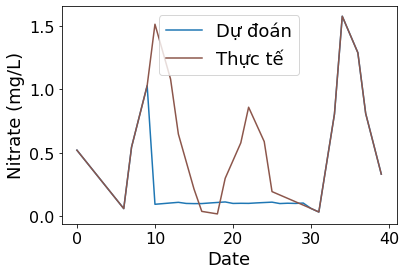

*************
i=:  380
left:  [0.43900000000000006, 0.579, 0.86, 0.7245, 0.589, 0.1939999999999999, 0.1674, 0.1408, 0.11419999999999998, 0.0876]
mid:  [0.061, 0.033, 0.4195, 0.8059999999999999, 1.578, 1.4340000000000002, 1.29, 0.8109999999999999, 0.5715, 0.332, 0.283, 0.23399999999999987, 0.336, 0.69, 0.8794999999999998, 1.069, 0.7070000000000001, 0.526, 0.345, 0.325]
right: [0.305, 0.3879999999999999, 0.471, 0.5539999999999999, 0.637, 0.8035, 0.97, 1.3019999999999998, 1.4635, 1.625]


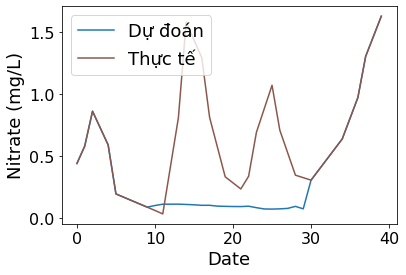

*************
i=:  400
left:  [0.283, 0.23399999999999987, 0.336, 0.69, 0.8794999999999998, 1.069, 0.7070000000000001, 0.526, 0.345, 0.325]
mid:  [0.305, 0.3879999999999999, 0.471, 0.5539999999999999, 0.637, 0.8035, 0.97, 1.3019999999999998, 1.4635, 1.625, 1.435, 1.275, 1.115, 0.741, 0.5539999999999999, 0.367, 0.36, 0.353, 0.3329999999999999, 0.698]
right: [0.4965, 0.295, 0.252, 0.209, 0.5, 0.473, 0.446, 0.471, 0.496, 0.521]


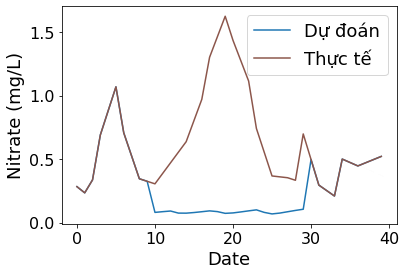

*************
i=:  420
left:  [1.435, 1.275, 1.115, 0.741, 0.5539999999999999, 0.367, 0.36, 0.353, 0.3329999999999999, 0.698]
mid:  [0.4965, 0.295, 0.252, 0.209, 0.5, 0.473, 0.446, 0.471, 0.496, 0.521, 0.701, 0.8809999999999999, 1.242, 1.382, 1.5219999999999998, 1.473, 1.366, 1.259, 1.044, 0.9370000000000002]
right: [0.83, 0.615, 0.605, 0.595, 0.406, 0.3935, 0.381, 0.34, 0.3335, 0.327]


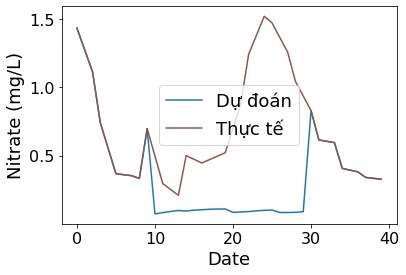

*************
i=:  440
left:  [0.701, 0.8809999999999999, 1.242, 1.382, 1.5219999999999998, 1.473, 1.366, 1.259, 1.044, 0.9370000000000002]
mid:  [0.83, 0.615, 0.605, 0.595, 0.406, 0.3935, 0.381, 0.34, 0.3335, 0.327, 0.314, 0.3105, 0.307, 0.3389999999999999, 0.337, 0.335, 0.821, 1.064, 1.307, 1.4340000000000002]
right: [1.4305, 1.4269999999999998, 1.42, 1.4165, 1.413, 1.245, 1.202, 1.159, 1.083, 0.976]


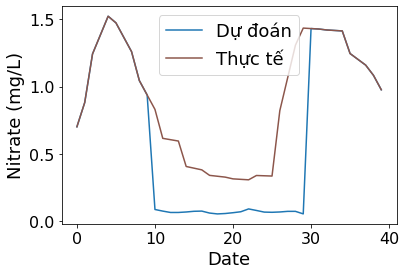

*************
i=:  460
left:  [0.314, 0.3105, 0.307, 0.3389999999999999, 0.337, 0.335, 0.821, 1.064, 1.307, 1.4340000000000002]
mid:  [1.4305, 1.4269999999999998, 1.42, 1.4165, 1.413, 1.245, 1.202, 1.159, 1.083, 0.976, 0.8690000000000002, 0.7859999999999999, 0.784, 0.782, 0.777, 0.775, 0.773, 0.615, 0.6476666670000001, 0.680333333]
right: [0.713, 0.9025000000000001, 1.092, 1.471, 1.1135, 0.7559999999999999, 0.04, 0.042, 0.044, 0.031]


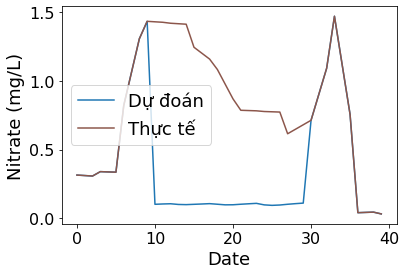

*************
i=:  480
left:  [0.8690000000000002, 0.7859999999999999, 0.784, 0.782, 0.777, 0.775, 0.773, 0.615, 0.6476666670000001, 0.680333333]
mid:  [0.713, 0.9025000000000001, 1.092, 1.471, 1.1135, 0.7559999999999999, 0.04, 0.042, 0.044, 0.031, 0.397, 0.763, 1.495, 1.422333333, 1.349666667, 1.277, 1.332, 1.439, 1.546, 1.5381818180000002]
right: [1.530363636, 1.522545455, 1.514727273, 1.506909091, 1.499090909, 1.491272727, 1.483454545, 1.475636364, 1.4678181819999998, 1.46]


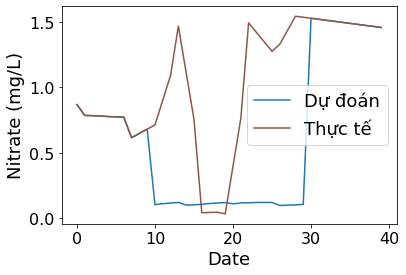

*************
i=:  500
left:  [0.397, 0.763, 1.495, 1.422333333, 1.349666667, 1.277, 1.332, 1.439, 1.546, 1.5381818180000002]
mid:  [1.530363636, 1.522545455, 1.514727273, 1.506909091, 1.499090909, 1.491272727, 1.483454545, 1.475636364, 1.4678181819999998, 1.46, 0.741, 0.382, 0.023, 0.6459999999999999, 0.9575, 1.269, 0.8780000000000001, 0.6829999999999999, 0.488, 0.0969999999999999]
right: [0.1255, 0.154, 0.144, 0.132, 0.11999999999999998, 0.138, 0.1365, 0.135, 0.145, 0.160333333]


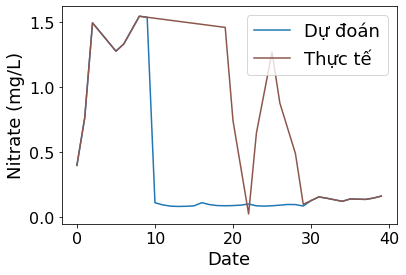

*************
i=:  520
left:  [0.741, 0.382, 0.023, 0.6459999999999999, 0.9575, 1.269, 0.8780000000000001, 0.6829999999999999, 0.488, 0.0969999999999999]
mid:  [0.1255, 0.154, 0.144, 0.132, 0.11999999999999998, 0.138, 0.1365, 0.135, 0.145, 0.160333333, 0.175666667, 0.191, 0.201, 0.159, 0.1169999999999999, 0.7809999999999999, 1.113, 1.445, 1.022, 0.8105]
right: [0.599, 0.176, 0.194333333, 0.21266666699999998, 0.231, 0.2315, 0.23199999999999993, 0.173, 0.149, 0.125]


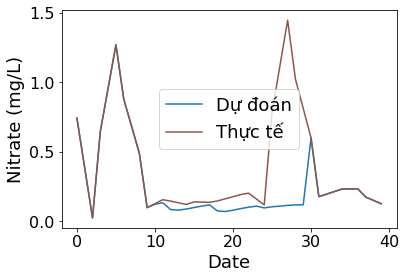

*************
i=:  540
left:  [0.175666667, 0.191, 0.201, 0.159, 0.1169999999999999, 0.7809999999999999, 1.113, 1.445, 1.022, 0.8105]
mid:  [0.599, 0.176, 0.194333333, 0.21266666699999998, 0.231, 0.2315, 0.23199999999999993, 0.173, 0.149, 0.125, 0.188, 0.201, 0.21399999999999997, 0.17, 0.126, 0.0819999999999999, 0.038, 0.166, 0.3339999999999999, 0.502]
right: [0.8390000000000001, 1.007, 1.175, 1.511, 1.2125, 0.9139999999999999, 0.616, 0.318, 0.2875, 0.257]


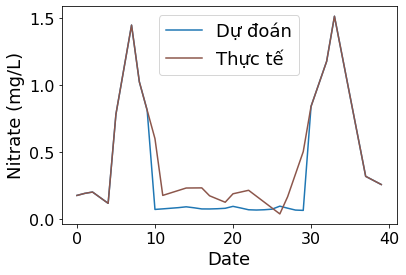

*************
i=:  560
left:  [0.188, 0.201, 0.21399999999999997, 0.17, 0.126, 0.0819999999999999, 0.038, 0.166, 0.3339999999999999, 0.502]
mid:  [0.8390000000000001, 1.007, 1.175, 1.511, 1.2125, 0.9139999999999999, 0.616, 0.318, 0.2875, 0.257, 0.195, 0.144, 0.093, 0.182, 0.2265, 0.271, 0.36, 0.3174, 0.2748, 0.2322]
right: [0.1896, 0.147, 0.142, 0.136, 0.13, 0.1169999999999999, 0.11099999999999999, 0.105, 0.2, 0.1689999999999999]


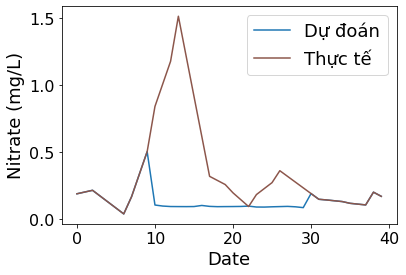

*************
i=:  580
left:  [0.195, 0.144, 0.093, 0.182, 0.2265, 0.271, 0.36, 0.3174, 0.2748, 0.2322]
mid:  [0.1896, 0.147, 0.142, 0.136, 0.13, 0.1169999999999999, 0.11099999999999999, 0.105, 0.2, 0.1689999999999999, 0.138, 0.1365, 0.135, 0.1335, 0.132, 0.11099999999999999, 0.474, 0.8370000000000001, 1.5619999999999998, 1.32]
right: [1.078, 0.595, 0.49820000000000003, 0.4014, 0.3046, 0.2078, 0.11099999999999999, 0.0819999999999999, 0.0805, 0.079]


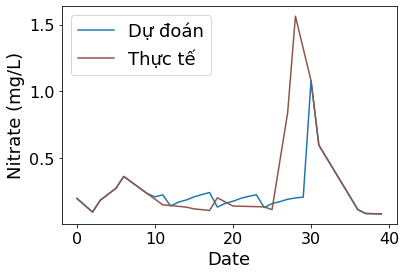

*************
i=:  600
left:  [0.138, 0.1365, 0.135, 0.1335, 0.132, 0.11099999999999999, 0.474, 0.8370000000000001, 1.5619999999999998, 1.32]
mid:  [1.078, 0.595, 0.49820000000000003, 0.4014, 0.3046, 0.2078, 0.11099999999999999, 0.0819999999999999, 0.0805, 0.079, 0.075, 0.0735, 0.072, 0.162, 0.138, 0.11400000000000002, 0.109, 0.104, 0.099, 0.078]
right: [0.05700000000000001, 0.10699999999999998, 0.132, 0.157, 0.208, 0.233, 0.258, 0.283, 0.308, 0.2005]


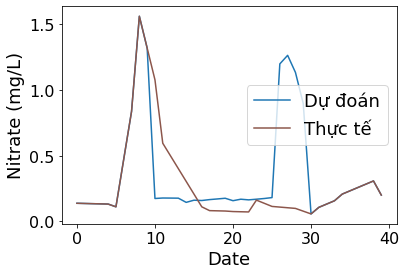

*************
i=:  620
left:  [0.075, 0.0735, 0.072, 0.162, 0.138, 0.11400000000000002, 0.109, 0.104, 0.099, 0.078]
mid:  [0.05700000000000001, 0.10699999999999998, 0.132, 0.157, 0.208, 0.233, 0.258, 0.283, 0.308, 0.2005, 0.093, 0.073, 0.053, 0.364, 0.52, 0.6759999999999999, 0.9879999999999999, 1.1435, 1.2990000000000002, 0.695]
right: [0.544, 0.3929999999999999, 0.242, 0.091, 0.0655, 0.04, 0.0448, 0.0496, 0.05439999999999999, 0.05920000000000001]


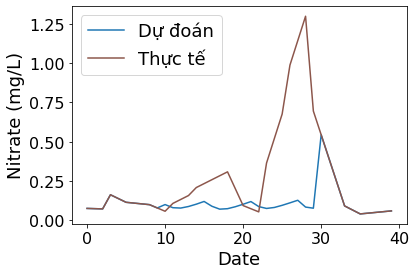

*************
i=:  640
left:  [0.093, 0.073, 0.053, 0.364, 0.52, 0.6759999999999999, 0.9879999999999999, 1.1435, 1.2990000000000002, 0.695]
mid:  [0.544, 0.3929999999999999, 0.242, 0.091, 0.0655, 0.04, 0.0448, 0.0496, 0.05439999999999999, 0.05920000000000001, 0.064, 0.0688, 0.0736, 0.0784, 0.0832, 0.088, 0.054, 0.057083333, 0.060166667, 0.06325]
right: [0.066333333, 0.069416667, 0.0725, 0.075583333, 0.078666667, 0.08175, 0.084833333, 0.0879166669999999, 0.091, 0.023]


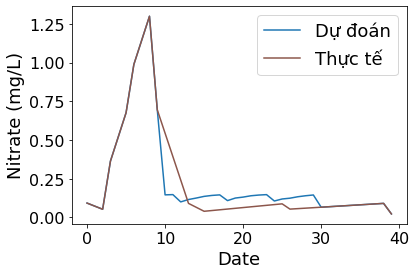

*************


IndexError: ignored

In [11]:
from fancyimpute import BiScaler, NuclearNormMinimization, SoftImpute, MatrixFactorization, SimilarityWeightedAveraging
from statsmodels.tsa.stattools import acf, pacf
from utils.prepare_QLD import test_qld_single_station
from tslearn.metrics import dtw, dtw_path
from fancyimpute import KNN
import datetime
import impyute
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from math import sqrt, fabs
import os
import sys
o_path = os.getcwd()
sys.path.append(o_path)

seed = 1234
np.random.seed(seed)

if __name__ == "__main__":

    miss = 20
    (x_train, y_train), (x_test, y_test), (scaler_x, scaler_y) = test_qld_single_station(10,10,miss)

    print('split train/test array')
    x_test_list = np.split(x_test, [10, 10+miss], axis=1)
    x_train_list = np.split(x_train, [10, 10+miss], axis=1)

    # Split input into two

    X_train_left = x_train_list[0]
    X_train_right = x_train_list[2]
    X_test_left = x_test_list[0]
    X_test_right = x_test_list[2]

    print('X_train_left:{}'.format(X_train_left.shape))
    print('X_train_right:{}'.format(X_train_right.shape))
    print('X_test_left:{}'.format(X_test_left.shape))
    print('X_test_right:{}'.format(X_test_right.shape))
    
    print('____________________________________________________________________')

    Model_list = ['Dual_SSIM']

    level_imputed_list = []
    NO3_imputed_list = []
    path = '/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet/Results_Kết quả chạy model_NO3/no3_20/NO3_20_1012_scal.npy'
    for l in Model_list:
        level_imputed_scal = path
        NO3_imputed_scal =  path

        level_imputed_array = np.load(level_imputed_scal)
        NO3_imputed_array = np.load(NO3_imputed_scal)

        level_imputed_array_reshape = np.array_split(level_imputed_array, level_imputed_array.shape[0]//miss)   
        NO3_imputed_array_reshape = np.array_split(NO3_imputed_array, NO3_imputed_array.shape[0]//miss)

        level_imputed_list.append(level_imputed_array_reshape)
        NO3_imputed_list.append(NO3_imputed_array_reshape)

    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    ######### loop ###############

    for i in range(000, 800, 20):
        X_test_left_pick = X_test_left[i, :, :]
        X_test_right_pick = X_test_right[i, :, :]
        y_test_pick = y_test[i, :, :]

        X_test_left_pick = np.expand_dims(X_test_left_pick, axis=0)
        X_test_right_pick = np.expand_dims(X_test_right_pick, axis=0)
        y_test_pick = np.expand_dims(y_test_pick, axis=0)

        '''print(X_test_left_pick.shape)
        print(X_test_right_pick.shape)
        print(y_test_pick.shape)'''

        print('*************')
        X_test_left_pick = scaler_x.inverse_transform(X_test_left_pick[0])
        X_test_right_pick = scaler_x.inverse_transform(X_test_right_pick[0])
        y_test_pick = scaler_y.inverse_transform(y_test_pick.reshape(1, -1))

        ######### giá trị điền khuyết #######

        imputed_Dual_SSIM = scaler_y.inverse_transform(level_imputed_list[0][i].reshape(-1, 1))
        
        imputed_Dual_SSIM_ori = [item for sublist in imputed_Dual_SSIM for item in sublist]
        



        # dim 5 --level    dim 2 --NO3
        list_before = X_test_left_pick[:, 2].tolist()
        list_middle = y_test_pick[0].tolist()
        list_after = X_test_right_pick[:, 2].tolist()

        print("i=: ", i)
        print('left: ', list_before)
        print("mid: ", list_middle)
        print('right:', list_after)


        ori_list = list_before + list_middle + list_after

        ###### dự đoán 6 giá trị ########
        pred_list_Dual_SSIM = list_before + imputed_Dual_SSIM_ori + list_after
       
        x = np.arange(len(ori_list))

        fig, ax = plt.subplots()
        ax.plot(pred_list_Dual_SSIM,color=tableau20[0], label='Dự đoán')
     
        ax.plot(ori_list, color=tableau20[10], label="Thực tế")

        ax.legend(loc='best', fontsize=18)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Nitrate (mg/L)', fontsize=18)

        plt.show()

#### 20

In [13]:
list_middle

[0.291,
 0.178,
 0.065,
 0.046,
 0.027,
 0.69,
 1.021,
 1.352,
 0.926,
 0.713,
 0.5,
 0.3939999999999999,
 0.288,
 0.043,
 0.05500000000000001,
 0.126,
 0.1969999999999999,
 0.3379999999999999,
 0.409,
 0.4799999999999999]

In [14]:
imputed_Dual_SSIM_ori

[0.64686984,
 0.6858311,
 0.54857534,
 0.5766127,
 0.58966076,
 0.62566864,
 0.65091085,
 0.6734604,
 0.5970788,
 0.631359,
 0.65198183,
 0.68389815,
 0.69363785,
 0.6940651,
 0.22067517,
 0.2166129,
 0.20034991,
 0.21044625,
 0.23077038,
 0.25955597]

In [15]:
pred_list_Dual_SSIM

[0.862,
 1.06,
 1.457,
 1.485,
 1.513,
 1.195,
 0.9125,
 0.63,
 0.517,
 0.4039999999999999,
 0.64686984,
 0.6858311,
 0.54857534,
 0.5766127,
 0.58966076,
 0.62566864,
 0.65091085,
 0.6734604,
 0.5970788,
 0.631359,
 0.65198183,
 0.68389815,
 0.69363785,
 0.6940651,
 0.22067517,
 0.2166129,
 0.20034991,
 0.21044625,
 0.23077038,
 0.25955597,
 0.622,
 0.5415,
 0.461,
 0.45474999999999993,
 0.4485,
 0.44225,
 0.436,
 0.4235,
 0.411,
 1.044]

In [16]:
ori_list

[0.862,
 1.06,
 1.457,
 1.485,
 1.513,
 1.195,
 0.9125,
 0.63,
 0.517,
 0.4039999999999999,
 0.291,
 0.178,
 0.065,
 0.046,
 0.027,
 0.69,
 1.021,
 1.352,
 0.926,
 0.713,
 0.5,
 0.3939999999999999,
 0.288,
 0.043,
 0.05500000000000001,
 0.126,
 0.1969999999999999,
 0.3379999999999999,
 0.409,
 0.4799999999999999,
 0.622,
 0.5415,
 0.461,
 0.45474999999999993,
 0.4485,
 0.44225,
 0.436,
 0.4235,
 0.411,
 1.044]

train_preprocess:(6551, 6)
test_preprocess:(2207, 6)
concatenated_x (6512, 40, 6)
concatenated_y (6512, 20)
len_all_case (6512,)
len_before_all_case (6512,)
x:(6512, 40, 6)
y:(6512, 20, 1)
concatenated_x (2168, 40, 6)
concatenated_y (2168, 20)
len_all_case (2168,)
len_before_all_case (2168,)
x:(2168, 40, 6)
y:(2168, 20, 1)
x_train:(6512, 40, 6)
y_train:(6512, 20, 1)
x_test:(2168, 40, 6)
y_test:(2168, 20, 1)
split train/test array
(2168, 10, 6)
(2168, 20, 6)
(2168, 10, 6)
split train/test array
X_train_left:(6512, 10, 6)
X_train_right:(6512, 10, 6)
X_test_left:(2168, 10, 6)
X_test_right:(2168, 10, 6)
____________________________________________________________________
*************
i=:  0
left:  [1.362, 0.936, 0.509, 0.4238, 0.3386, 0.2534, 0.1682, 0.083, 0.038, 0.505]
mid:  [0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291]
right: [0.178, 0.065, 0.046, 

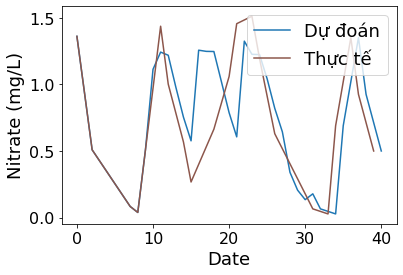

*************
i=:  1
left:  [0.936, 0.509, 0.4238, 0.3386, 0.2534, 0.1682, 0.083, 0.038, 0.505, 0.971]
mid:  [1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178]
right: [0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999]


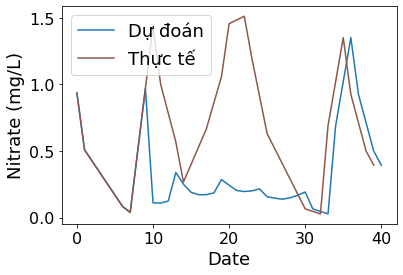

*************
i=:  2
left:  [0.509, 0.4238, 0.3386, 0.2534, 0.1682, 0.083, 0.038, 0.505, 0.971, 1.4380000000000002]
mid:  [1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065]
right: [0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288]


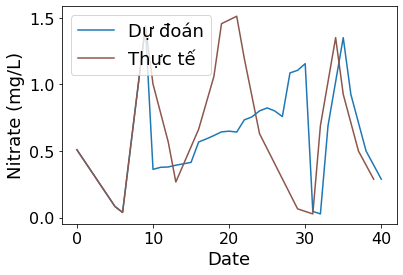

*************
i=:  3
left:  [0.4238, 0.3386, 0.2534, 0.1682, 0.083, 0.038, 0.505, 0.971, 1.4380000000000002, 1.003]
mid:  [0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046]
right: [0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043]


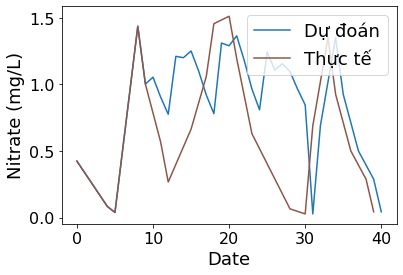

*************
i=:  4
left:  [0.3386, 0.2534, 0.1682, 0.083, 0.038, 0.505, 0.971, 1.4380000000000002, 1.003, 0.7855]
mid:  [0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027]
right: [0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001]


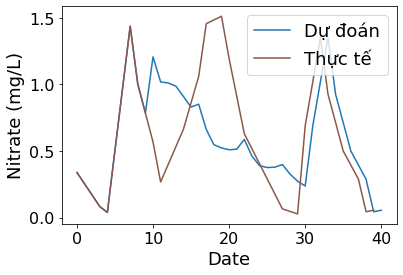

*************
i=:  5
left:  [0.2534, 0.1682, 0.083, 0.038, 0.505, 0.971, 1.4380000000000002, 1.003, 0.7855, 0.568]
mid:  [0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69]
right: [1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126]


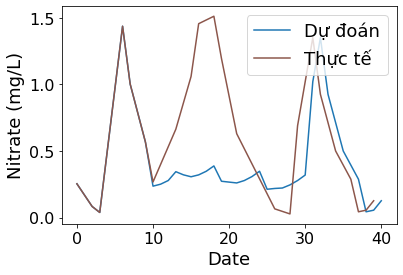

*************
i=:  6
left:  [0.1682, 0.083, 0.038, 0.505, 0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267]
mid:  [0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021]
right: [1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999]


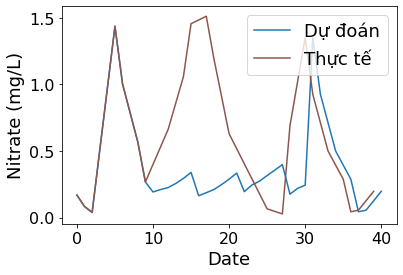

*************
i=:  7
left:  [0.083, 0.038, 0.505, 0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999]
mid:  [0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352]
right: [0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999]


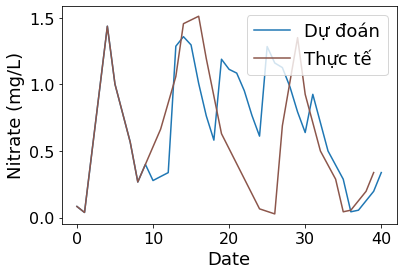

*************
i=:  8
left:  [0.038, 0.505, 0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667]
mid:  [0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926]
right: [0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409]


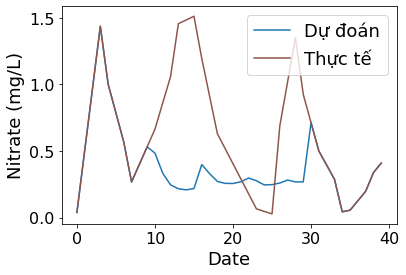

*************
i=:  9
left:  [0.505, 0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664]
mid:  [0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713]
right: [0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999]


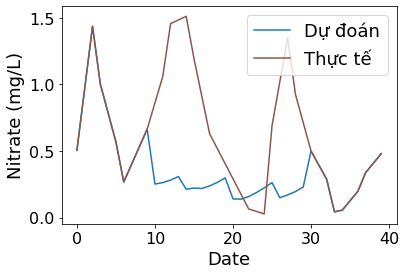

*************
i=:  10
left:  [0.971, 1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862]
mid:  [1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5]
right: [0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622]


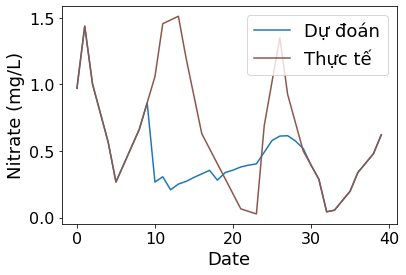

*************
i=:  11
left:  [1.4380000000000002, 1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06]
mid:  [1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999]
right: [0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622, 0.5415]


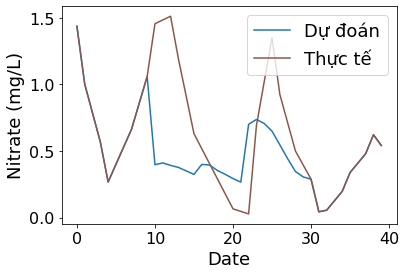

*************
i=:  12
left:  [1.003, 0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457]
mid:  [1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288]
right: [0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622, 0.5415, 0.461]


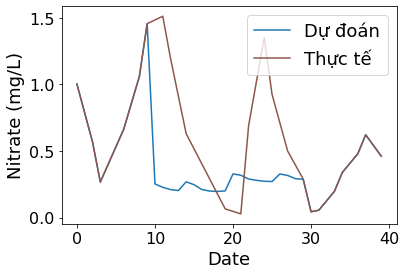

*************
i=:  13
left:  [0.7855, 0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485]
mid:  [1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043]
right: [0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622, 0.5415, 0.461, 0.45474999999999993]


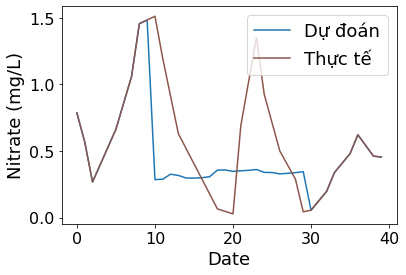

*************
i=:  14
left:  [0.568, 0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513]
mid:  [1.195, 0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001]
right: [0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622, 0.5415, 0.461, 0.45474999999999993, 0.4485]


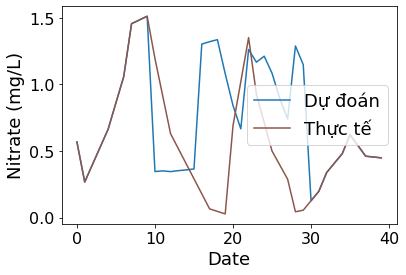

*************
i=:  15
left:  [0.267, 0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195]
mid:  [0.9125, 0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126]
right: [0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999, 0.622, 0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225]


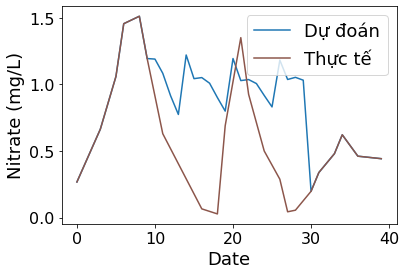

*************
i=:  16
left:  [0.3993333329999999, 0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125]
mid:  [0.63, 0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999]
right: [0.3379999999999999, 0.409, 0.4799999999999999, 0.622, 0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225, 0.436]


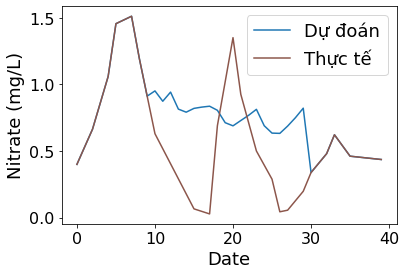

*************
i=:  17
left:  [0.531666667, 0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63]
mid:  [0.517, 0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999]
right: [0.409, 0.4799999999999999, 0.622, 0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225, 0.436, 0.4235]


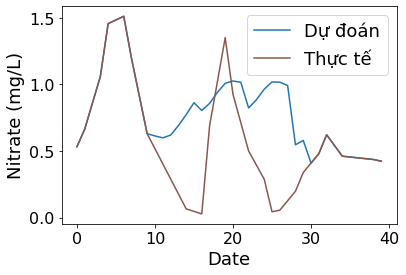

*************
i=:  18
left:  [0.664, 0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517]
mid:  [0.4039999999999999, 0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409]
right: [0.4799999999999999, 0.622, 0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225, 0.436, 0.4235, 0.411]


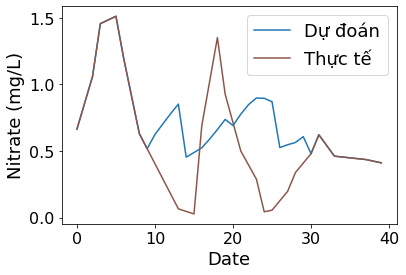

*************
i=:  19
left:  [0.862, 1.06, 1.457, 1.485, 1.513, 1.195, 0.9125, 0.63, 0.517, 0.4039999999999999]
mid:  [0.291, 0.178, 0.065, 0.046, 0.027, 0.69, 1.021, 1.352, 0.926, 0.713, 0.5, 0.3939999999999999, 0.288, 0.043, 0.05500000000000001, 0.126, 0.1969999999999999, 0.3379999999999999, 0.409, 0.4799999999999999]
right: [0.622, 0.5415, 0.461, 0.45474999999999993, 0.4485, 0.44225, 0.436, 0.4235, 0.411, 1.044]


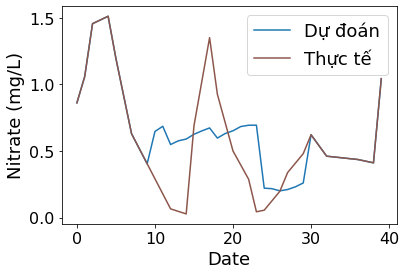

In [12]:
from fancyimpute import BiScaler, NuclearNormMinimization, SoftImpute, MatrixFactorization, SimilarityWeightedAveraging
from statsmodels.tsa.stattools import acf, pacf
from utils.prepare_QLD import test_qld_single_station
from tslearn.metrics import dtw, dtw_path
from fancyimpute import KNN
import datetime
import impyute
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from math import sqrt, fabs
import os
import sys
o_path = os.getcwd()
sys.path.append(o_path)

seed = 1234
np.random.seed(seed)

if __name__ == "__main__":

    miss = 20
    (x_train, y_train), (x_test, y_test), (scaler_x, scaler_y) = test_qld_single_station(10,10,miss)

    print('split train/test array')
    x_test_list = np.split(x_test, [10, 10+miss], axis=1)
    x_train_list = np.split(x_train, [10, 10+miss], axis=1)

    # Split input into two

    X_train_left = x_train_list[0]
    X_train_right = x_train_list[2]
    X_test_left = x_test_list[0]
    X_test_right = x_test_list[2]

    print('X_train_left:{}'.format(X_train_left.shape))
    print('X_train_right:{}'.format(X_train_right.shape))
    print('X_test_left:{}'.format(X_test_left.shape))
    print('X_test_right:{}'.format(X_test_right.shape))
    
    print('____________________________________________________________________')

    Model_list = ['Dual_SSIM']

    level_imputed_list = []
    NO3_imputed_list = []
    path = '/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet/Results_Kết quả chạy model_NO3/no3_20/NO3_20_1012_scal.npy'
    for l in Model_list:
        level_imputed_scal = path
        NO3_imputed_scal =  path

        level_imputed_array = np.load(level_imputed_scal)
        NO3_imputed_array = np.load(NO3_imputed_scal)

        level_imputed_array_reshape = np.array_split(level_imputed_array, level_imputed_array.shape[0]//miss)   
        NO3_imputed_array_reshape = np.array_split(NO3_imputed_array, NO3_imputed_array.shape[0]//miss)

        level_imputed_list.append(level_imputed_array_reshape)
        NO3_imputed_list.append(NO3_imputed_array_reshape)

    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    ######### loop ###############

    for i in range(0, 20, 1):
        X_test_left_pick = X_test_left[i, :, :]
        X_test_right_pick = X_test_right[i, :, :]
        y_test_pick = y_test[i, :, :]

        X_test_left_pick = np.expand_dims(X_test_left_pick, axis=0)
        X_test_right_pick = np.expand_dims(X_test_right_pick, axis=0)
        y_test_pick = np.expand_dims(y_test_pick, axis=0)

        '''print(X_test_left_pick.shape)
        print(X_test_right_pick.shape)
        print(y_test_pick.shape)'''

        print('*************')
        X_test_left_pick = scaler_x.inverse_transform(X_test_left_pick[0])
        X_test_right_pick = scaler_x.inverse_transform(X_test_right_pick[0])
        y_test_pick = scaler_y.inverse_transform(y_test_pick.reshape(1, -1))

        ######### giá trị điền khuyết #######

        imputed_Dual_SSIM = scaler_y.inverse_transform(level_imputed_list[0][i].reshape(-1, 1))
        
        imputed_Dual_SSIM_ori = [item for sublist in imputed_Dual_SSIM for item in sublist]
        



        # dim 5 --level    dim 2 --NO3
        list_before = X_test_left_pick[:, 2].tolist()
        list_middle = y_test_pick[0].tolist()
        list_after = X_test_right_pick[:, 2].tolist()

        print("i=: ", i)
        print('left: ', list_before)
        print("mid: ", list_middle)
        print('right:', list_after)


        ori_list = list_before + list_middle + list_after

        ###### dự đoán 6 giá trị ########
        pred_list_Dual_SSIM = list_before + imputed_Dual_SSIM_ori + list_after
       
        x = np.arange(len(ori_list))

        fig, ax = plt.subplots()
        ax.plot(pred_list_Dual_SSIM,color=tableau20[0], label='Dự đoán')
     
        ax.plot(ori_list, color=tableau20[10], label="Thực tế")

        ax.legend(loc='best', fontsize=18)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Nitrate (mg/L)', fontsize=18)

        plt.show()

### Visu Level

In [ ]:
(x_train, y_train), (x_test, y_test), (scaler_x, scaler_y) = test_qld_single_station_Level(20,20,15)

train_preprocess:(6551, 6)
test_preprocess:(2207, 6)
concatenated_x (6497, 55, 6)
concatenated_y (6497, 15)
len_all_case (6497,)
len_before_all_case (6497,)
x:(6497, 55, 6)
y:(6497, 15, 1)
concatenated_x (2153, 55, 6)
concatenated_y (2153, 15)
len_all_case (2153,)
len_before_all_case (2153,)
x:(2153, 55, 6)
y:(2153, 15, 1)
x_train:(6497, 55, 6)
y_train:(6497, 15, 1)
x_test:(2153, 55, 6)
y_test:(2153, 15, 1)
split train/test array
(2153, 20, 6)
(2153, 15, 6)
(2153, 20, 6)


train_preprocess:(6551, 6)
test_preprocess:(2207, 6)
concatenated_x (6526, 26, 6)
concatenated_y (6526, 6)
len_all_case (6526,)
len_before_all_case (6526,)
x:(6526, 26, 6)
y:(6526, 6, 1)
concatenated_x (2182, 26, 6)
concatenated_y (2182, 6)
len_all_case (2182,)
len_before_all_case (2182,)
x:(2182, 26, 6)
y:(2182, 6, 1)
x_train:(6526, 26, 6)
y_train:(6526, 6, 1)
x_test:(2182, 26, 6)
y_test:(2182, 6, 1)
split train/test array
(2182, 10, 6)
(2182, 6, 6)
(2182, 10, 6)
split train/test array
X_train_left:(6526, 10, 6)
X_train_right:(6526, 10, 6)
X_test_left:(2182, 10, 6)
X_test_right:(2182, 10, 6)
____________________________________________________________________
*************
i=:  0
left:  [15.261428569999998, 14.877142859999998, 14.55714286, 14.328571429999998, 14.17, 14.065, 14.148, 14.44285714, 14.92, 15.371428570000003]
mid:  [15.65666667, 15.64166667, 15.37571429, 15.11285714, 14.84285714, 14.56857143]
right: [14.341666670000002, 14.235, 14.313333329999999, 14.64142857, 14.97428571,

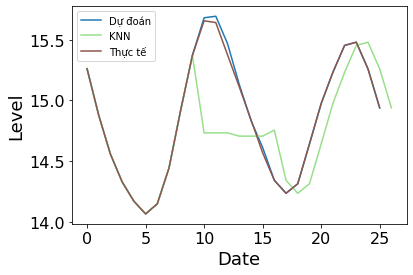

*************
i=:  10
left:  [15.65666667, 15.64166667, 15.37571429, 15.11285714, 14.84285714, 14.56857143, 14.341666670000002, 14.235, 14.313333329999999, 14.64142857]
mid:  [14.97428571, 15.23166667, 15.45333333, 15.48, 15.260000000000002, 14.938571430000001]
right: [14.663333330000002, 14.43857143, 14.26166667, 14.1125, 14.1275, 14.29166667, 14.63142857, 14.98285714, 15.28, 15.513333329999998]


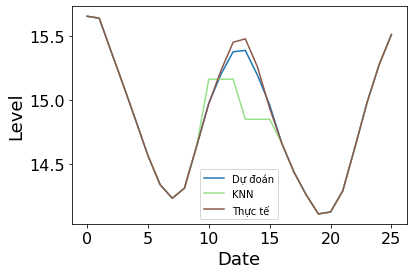

*************
i=:  20
left:  [14.97428571, 15.23166667, 15.45333333, 15.48, 15.260000000000002, 14.938571430000001, 14.663333330000002, 14.43857143, 14.26166667, 14.1125]
mid:  [14.1275, 14.29166667, 14.63142857, 14.98285714, 15.28, 15.513333329999998]
right: [15.4775, 15.346666669999998, 15.16833333, 14.957999999999998, 14.752, 14.612499999999999, 14.539999999999997, 14.609999999999998, 14.758, 14.910000000000002]


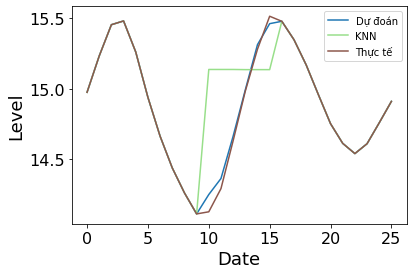

*************
i=:  30
left:  [14.1275, 14.29166667, 14.63142857, 14.98285714, 15.28, 15.513333329999998, 15.4775, 15.346666669999998, 15.16833333, 14.957999999999998]
mid:  [14.752, 14.612499999999999, 14.539999999999997, 14.609999999999998, 14.758, 14.910000000000002]
right: [15.0275, 15.15, 15.11, 14.965, 14.767999999999999, 14.62, 14.46333333, 14.3225, 14.25, 14.33]


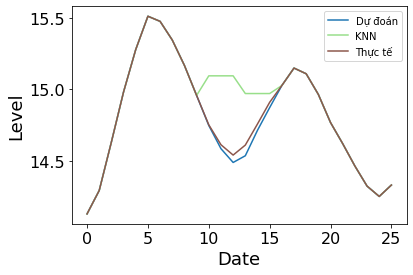

*************
i=:  40
left:  [14.752, 14.612499999999999, 14.539999999999997, 14.609999999999998, 14.758, 14.910000000000002, 15.0275, 15.15, 15.11, 14.965]
mid:  [14.767999999999999, 14.62, 14.46333333, 14.3225, 14.25, 14.33]
right: [14.54333333, 14.771999999999998, 14.99, 15.26666667, 15.40666667, 15.44, 15.425, 15.3675, 15.2625, 15.091666670000002]


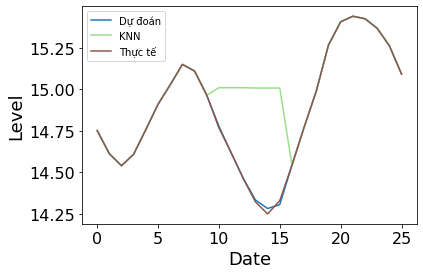

*************
i=:  50
left:  [14.767999999999999, 14.62, 14.46333333, 14.3225, 14.25, 14.33, 14.54333333, 14.771999999999998, 14.99, 15.26666667]
mid:  [15.40666667, 15.44, 15.425, 15.3675, 15.2625, 15.091666670000002]
right: [14.9375, 14.855, 14.82, 14.785, 14.785, 14.891999999999998, 14.97666667, 14.955, 14.87666667, 14.825]


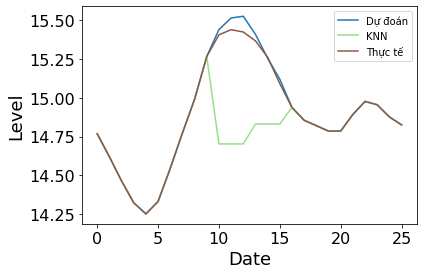

*************
i=:  60
left:  [15.40666667, 15.44, 15.425, 15.3675, 15.2625, 15.091666670000002, 14.9375, 14.855, 14.82, 14.785]
mid:  [14.785, 14.891999999999998, 14.97666667, 14.955, 14.87666667, 14.825]
right: [14.77333333, 14.678, 14.557499999999997, 14.505, 14.52, 14.6225, 14.77333333, 14.97, 15.168000000000001, 15.327499999999999]


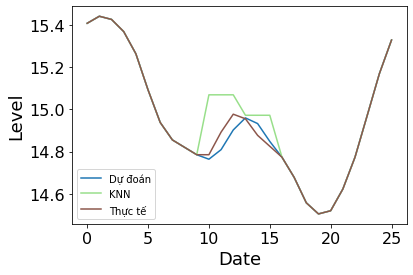

*************
i=:  70
left:  [14.785, 14.891999999999998, 14.97666667, 14.955, 14.87666667, 14.825, 14.77333333, 14.678, 14.557499999999997, 14.505]
mid:  [14.52, 14.6225, 14.77333333, 14.97, 15.168000000000001, 15.327499999999999]
right: [15.482, 15.58, 15.590000000000002, 15.485000000000001, 15.359999999999998, 15.186, 14.961999999999998, 14.78, 14.67, 14.64]


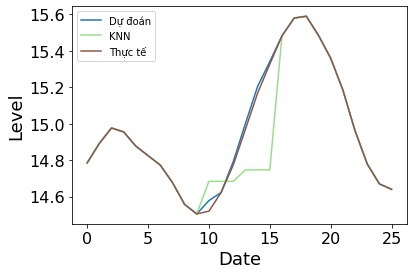

*************
i=:  80
left:  [14.52, 14.6225, 14.77333333, 14.97, 15.168000000000001, 15.327499999999999, 15.482, 15.58, 15.590000000000002, 15.485000000000001]
mid:  [15.359999999999998, 15.186, 14.961999999999998, 14.78, 14.67, 14.64]
right: [14.629999999999999, 14.655, 14.775, 14.89, 14.94, 14.86, 14.763333329999998, 14.686666670000001, 14.596666669999998, 14.545000000000002]


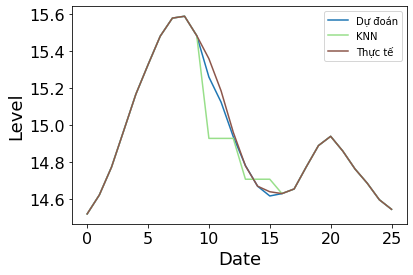

*************
i=:  90
left:  [15.359999999999998, 15.186, 14.961999999999998, 14.78, 14.67, 14.64, 14.629999999999999, 14.655, 14.775, 14.89]
mid:  [14.94, 14.86, 14.763333329999998, 14.686666670000001, 14.596666669999998, 14.545000000000002]
right: [14.510000000000002, 14.62, 14.798, 14.985, 15.28714286, 15.499999999999998, 15.635, 15.69, 15.57833333, 15.41]


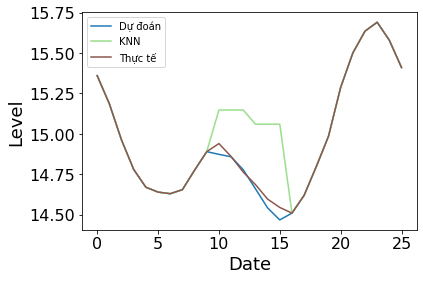

In [ ]:
from utils.prepare_QLD_Level import test_qld_single_station_Level
seed = 1234
np.random.seed(seed)

if __name__ == "__main__":

    (x_train, y_train), (x_test, y_test), (scaler_x, scaler_y) = test_qld_single_station_Level(10,10,10)

    print('split train/test array')
    x_test_list = np.split(x_test, [10, 16], axis=1)
    x_train_list = np.split(x_train, [10, 16], axis=1)

    # Split input into two

    X_train_left = x_train_list[0]
    X_train_right = x_train_list[2]
    X_test_left = x_test_list[0]
    X_test_right = x_test_list[2]

    print('X_train_left:{}'.format(X_train_left.shape))
    print('X_train_right:{}'.format(X_train_right.shape))
    print('X_test_left:{}'.format(X_test_left.shape))
    print('X_test_right:{}'.format(X_test_right.shape))
    
    print('____________________________________________________________________')

   # Model_list = ['Dual_SSIM', 'knn']
    Model_list = ['Dual_SSIM']

    level_imputed_list = []
    NO3_imputed_list = []

    for l in Model_list:
        level_imputed_scal = f'/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet/Results_Kết quả chạy model_Level/{l}_Level6_1012_scal.npy'
        NO3_imputed_scal = f'/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet/Results_Kết quả chạy model_Level/{l}_Level6_1012_scal.npy'

    
        level_imputed_array = np.load(level_imputed_scal)
        NO3_imputed_array = np.load(NO3_imputed_scal)

        level_imputed_array_reshape = np.array_split(level_imputed_array, level_imputed_array.shape[0]//6)   ### 6 output 
        NO3_imputed_array_reshape = np.array_split(NO3_imputed_array, NO3_imputed_array.shape[0]//6)

        level_imputed_list.append(level_imputed_array_reshape)
        NO3_imputed_list.append(NO3_imputed_array_reshape)

    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    ######### loop ###############

    for i in range(0, 100, 10):
        X_test_left_pick = X_test_left[i, :, :]
        X_test_right_pick = X_test_right[i, :, :]
        y_test_pick = y_test[i, :, :]

        X_test_left_pick = np.expand_dims(X_test_left_pick, axis=0)
        X_test_right_pick = np.expand_dims(X_test_right_pick, axis=0)
        y_test_pick = np.expand_dims(y_test_pick, axis=0)

        '''print(X_test_left_pick.shape)
        print(X_test_right_pick.shape)
        print(y_test_pick.shape)'''

        print('*************')
        X_test_left_pick = scaler_x.inverse_transform(X_test_left_pick[0])
        X_test_right_pick = scaler_x.inverse_transform(X_test_right_pick[0])
        y_test_pick = scaler_y.inverse_transform(y_test_pick.reshape(1, -1))

        ######### giá trị điền khuyết #######

        imputed_Dual_SSIM = scaler_y.inverse_transform(level_imputed_list[0][i].reshape(-1, 1))
        imputed_KNN = scaler_y.inverse_transform(level_imputed_list[1][i].reshape(-1, 1))


        imputed_Dual_SSIM_ori = [item for sublist in imputed_Dual_SSIM for item in sublist]
        imputed_KNN_ori = [item for sublist in imputed_KNN for item in sublist]

        # dim 5 --level    dim 2 --NO3
        list_before = X_test_left_pick[:, 5].tolist()
        list_middle = y_test_pick[0].tolist()
        list_after = X_test_right_pick[:, 5].tolist()

        print("i=: ", i)
        print('left: ', list_before)
        print("mid: ", list_middle)
        print('right:', list_after)


        ori_list = list_before + list_middle + list_after

        ###### dự đoán 6 giá trị ########
        pred_list_Dual_SSIM = list_before + imputed_Dual_SSIM_ori + list_after
        pred_list_KNN = list_before + imputed_KNN_ori + list_after


        x = np.arange(len(ori_list))

        fig, ax = plt.subplots()
        ax.plot(pred_list_Dual_SSIM,color=tableau20[0], label='Dự đoán')
        ax.plot(pred_list_KNN, color=tableau20[5], label='KNN')

        ax.plot(ori_list, color=tableau20[10], label="Thực tế")

        ax.legend(loc='best', fontsize=10)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Level', fontsize=18)

        plt.show()

### Level 10

train_preprocess:(6551, 6)
test_preprocess:(2207, 6)
concatenated_x (6522, 30, 6)
concatenated_y (6522, 10)
len_all_case (6522,)
len_before_all_case (6522,)
x:(6522, 30, 6)
y:(6522, 10, 1)
concatenated_x (2178, 30, 6)
concatenated_y (2178, 10)
len_all_case (2178,)
len_before_all_case (2178,)
x:(2178, 30, 6)
y:(2178, 10, 1)
x_train:(6522, 30, 6)
y_train:(6522, 10, 1)
x_test:(2178, 30, 6)
y_test:(2178, 10, 1)
split train/test array
(2178, 10, 6)
(2178, 10, 6)
(2178, 10, 6)
split train/test array
X_train_left:(6522, 10, 6)
X_train_right:(6522, 10, 6)
X_test_left:(2178, 10, 6)
X_test_right:(2178, 10, 6)
____________________________________________________________________
*************
i=:  0
left:  [15.261428569999998, 14.877142859999998, 14.55714286, 14.328571429999998, 14.17, 14.065, 14.148, 14.44285714, 14.92, 15.371428570000003]
mid:  [15.65666667, 15.64166667, 15.37571429, 15.11285714, 14.84285714, 14.56857143, 14.341666670000002, 14.235, 14.313333329999999, 14.64142857]
right: [14.97

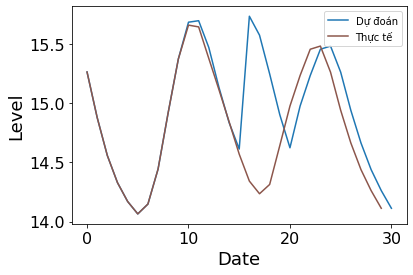

*************
i=:  150
left:  [15.049999999999999, 14.944, 14.78666667, 14.574285709999998, 14.37285714, 14.2375, 14.2, 14.313333329999999, 14.64428571, 14.992857140000002]
mid:  [15.34166667, 15.66666667, 15.795, 15.724, 15.48142857, 15.168571430000002, 14.855, 14.53, 14.341666670000002, 14.22]
right: [14.251999999999999, 14.45714286, 14.72333333, 15.02666667, 15.165, 15.099999999999998, 14.9325, 14.701666669999998, 14.46428571, 14.299999999999999]


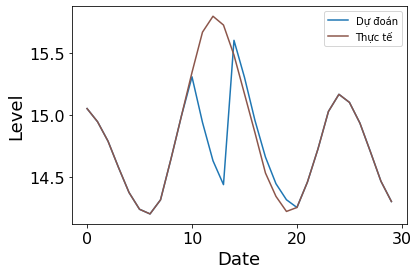

*************
i=:  300
left:  [14.61166667, 14.37142857, 14.2225, 14.17, 14.357142860000002, 14.72428571, 15.13, 15.46142857, 15.633333329999997, 15.57333333]
mid:  [15.281428570000001, 14.95142857, 14.64428571, 14.4, 14.224, 14.09333333, 14.154999999999998, 14.43571429, 14.825714290000002, 15.202857140000003]
right: [15.46166667, 15.5475, 15.34142857, 15.04, 14.76, 14.49833333, 14.327999999999998, 14.215, 14.299999999999999, 14.614285709999999]


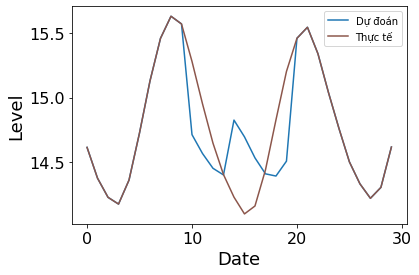

*************
i=:  450
left:  [14.966666669999999, 14.87666667, 14.805000000000001, 14.75333333, 14.695, 14.66, 14.655, 14.625, 14.59, 14.555]
mid:  [14.524999999999999, 14.510000000000002, 14.45666667, 14.419999999999998, 14.445, 14.5375, 14.66833333, 14.85833333, 15.06, 15.2175]
right: [15.347500000000002, 15.415000000000001, 15.41, 15.335, 15.182, 15.030000000000001, 14.85166667, 14.685000000000002, 14.559999999999999, 14.495]


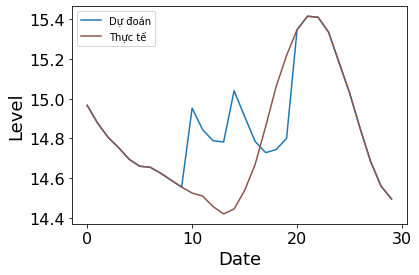

*************
i=:  600
left:  [14.64428571, 14.40857143, 14.2525, 14.2725, 14.63571429, 15.18571429, 15.66857143, 15.966000000000001, 15.941666669999998, 15.60285714]
mid:  [15.19714286, 14.80142857, 14.50571429, 14.315000000000001, 14.17, 14.27666667, 14.73142857, 15.37285714, 15.918571430000002, 16.27714286]
right: [16.3825, 16.12571429, 15.66571429, 15.168571430000002, 14.782857139999999, 14.49857143, 14.316, 14.17, 14.274, 14.81285714]


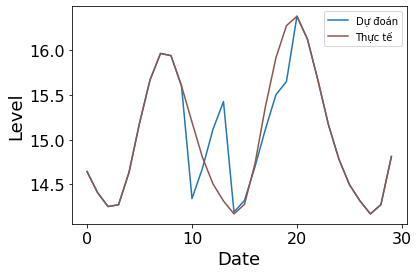

*************
i=:  750
left:  [14.325999999999999, 14.531666670000002, 14.80857143, 15.085714290000002, 15.36571429, 15.590000000000002, 15.715, 15.7, 15.625000000000002, 15.504]
mid:  [15.296666669999999, 15.113333329999998, 14.954000000000002, 14.84333333, 14.81, 14.79, 14.8, 14.835, 14.869999999999997, 14.815]
right: [14.755000000000003, 14.693333329999998, 14.61333333, 14.53, 14.47, 14.48, 14.6, 14.770000000000001, 14.98666667, 15.202]


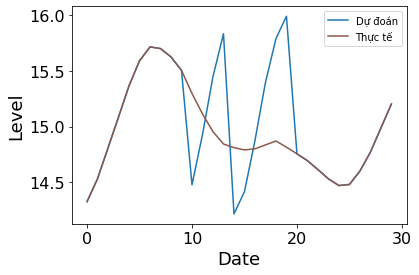

*************
i=:  900
left:  [14.349999999999998, 14.41333333, 14.66, 14.979999999999999, 15.32142857, 15.630000000000003, 15.793333330000001, 15.7675, 15.51142857, 15.18571429]
mid:  [14.855714289999998, 14.56857143, 14.35285714, 14.22, 14.229999999999999, 14.455714290000001, 14.75333333, 15.0925, 15.36833333, 15.450000000000001]
right: [15.29285714, 15.03571429, 14.79, 14.55428571, 14.368000000000002, 14.280000000000001, 14.45, 14.736666669999998, 15.09125, 15.44571429]


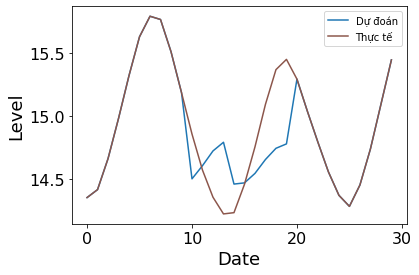

In [21]:
from utils.prepare_QLD_Level import test_qld_single_station_Level
seed = 1234
np.random.seed(seed)

if __name__ == "__main__":
    miss=10
    (x_train, y_train), (x_test, y_test), (scaler_x, scaler_y) = test_qld_single_station_Level(10,10,miss)

    print('split train/test array')
    x_test_list = np.split(x_test, [10, 10+miss], axis=1)
    x_train_list = np.split(x_train, [10, 10+miss], axis=1)

    # Split input into two

    X_train_left = x_train_list[0]
    X_train_right = x_train_list[2]
    X_test_left = x_test_list[0]
    X_test_right = x_test_list[2]

    print('X_train_left:{}'.format(X_train_left.shape))
    print('X_train_right:{}'.format(X_train_right.shape))
    print('X_test_left:{}'.format(X_test_left.shape))
    print('X_test_right:{}'.format(X_test_right.shape))
    
    print('____________________________________________________________________')

   # Model_list = ['Dual_SSIM', 'knn']
    Model_list = ['Dual_SSIM']

    level_imputed_list = []
    NO3_imputed_list = []

    path = '/content/gdrive/MyDrive/Project_HK1_2022/Data_Visualization/Code/Model_dienkhuyet/Results_Kết quả chạy model_Level/Dual_SSIM_Level6_1012_scal.npy'
    for l in Model_list:
        level_imputed_scal = path
        NO3_imputed_scal = path

    
        level_imputed_array = np.load(level_imputed_scal)
        NO3_imputed_array = np.load(NO3_imputed_scal)

        level_imputed_array_reshape = np.array_split(level_imputed_array, level_imputed_array.shape[0]//miss)  
        NO3_imputed_array_reshape = np.array_split(NO3_imputed_array, NO3_imputed_array.shape[0]//miss)

        level_imputed_list.append(level_imputed_array_reshape)
        NO3_imputed_list.append(NO3_imputed_array_reshape)

    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    ######### loop ###############

    for i in range(0, 1000, 150):
        X_test_left_pick = X_test_left[i, :, :]
        X_test_right_pick = X_test_right[i, :, :]
        y_test_pick = y_test[i, :, :]

        X_test_left_pick = np.expand_dims(X_test_left_pick, axis=0)
        X_test_right_pick = np.expand_dims(X_test_right_pick, axis=0)
        y_test_pick = np.expand_dims(y_test_pick, axis=0)

        '''print(X_test_left_pick.shape)
        print(X_test_right_pick.shape)
        print(y_test_pick.shape)'''

        print('*************')
        X_test_left_pick = scaler_x.inverse_transform(X_test_left_pick[0])
        X_test_right_pick = scaler_x.inverse_transform(X_test_right_pick[0])
        y_test_pick = scaler_y.inverse_transform(y_test_pick.reshape(1, -1))

        ######### giá trị điền khuyết #######

        imputed_Dual_SSIM = scaler_y.inverse_transform(level_imputed_list[0][i].reshape(-1, 1))
        #imputed_KNN = scaler_y.inverse_transform(level_imputed_list[1][i].reshape(-1, 1))


        imputed_Dual_SSIM_ori = [item for sublist in imputed_Dual_SSIM for item in sublist]
        #imputed_KNN_ori = [item for sublist in imputed_KNN for item in sublist]

        # dim 5 --level    dim 2 --NO3
        list_before = X_test_left_pick[:, 5].tolist()
        list_middle = y_test_pick[0].tolist()
        list_after = X_test_right_pick[:, 5].tolist()

        print("i=: ", i)
        print('left: ', list_before)
        print("mid: ", list_middle)
        print('right:', list_after)


        ori_list = list_before + list_middle + list_after

        ###### dự đoán 6 giá trị ########
        pred_list_Dual_SSIM = list_before + imputed_Dual_SSIM_ori + list_after
        #pred_list_KNN = list_before + imputed_KNN_ori + list_after


        x = np.arange(len(ori_list))

        fig, ax = plt.subplots()
        ax.plot(pred_list_Dual_SSIM,color=tableau20[0], label='Dự đoán')
        #ax.plot(pred_list_KNN, color=tableau20[5], label='KNN')

        ax.plot(ori_list, color=tableau20[10], label="Thực tế")

        ax.legend(loc='best', fontsize=10)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Level', fontsize=18)

        plt.show()